# ***Load Data***

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/tweet-emosi/Twitter_Emotion_Dataset.csv')  
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


# ***EDA***

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/tweet-emosi/Twitter_Emotion_Dataset.csv')

# Tampilkan 5 data pertama
print("🔹 5 Data Teratas:")
print(df.head())

# Tampilkan info struktur data
print("\n🔹 Informasi Dataset:")
print(df.info())

# Tampilkan distribusi label
print("\n🔹 Distribusi Label Emosi:")
print(df['label'].value_counts())


🔹 5 Data Teratas:
   label                                              tweet
0  anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...
1  anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...
2  happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3  anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...
4  happy  Sharing pengalaman aja, kemarin jam 18.00 bata...

🔹 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4401 non-null   object
 1   tweet   4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB
None

🔹 Distribusi Label Emosi:
label
anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Buat objek encoder
label_encoder = LabelEncoder()

# Encode kolom label (misalnya: happy → 0, anger → 1, ...)
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Simpan mapping label → angka
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\n🔹 Mapping Label ke Angka:")
print(label_mapping)



🔹 Mapping Label ke Angka:
{'anger': np.int64(0), 'fear': np.int64(1), 'happy': np.int64(2), 'love': np.int64(3), 'sadness': np.int64(4)}


# ***Split Data***

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['tweet'], df['label_encoded'], test_size=0.2, random_state=42, stratify=df['label_encoded']
)

print(f"\n🔹 Jumlah Data Latih: {len(train_texts)}")
print(f"🔹 Jumlah Data Uji: {len(test_texts)}")



🔹 Jumlah Data Latih: 3520
🔹 Jumlah Data Uji: 881


In [ ]:
df['char_count'] = df['tweet'].apply(len)
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))
print(df.groupby('label')[['char_count', 'word_count']].mean())

         char_count  word_count
label                          
anger    187.948229   29.676658
fear     183.790447   30.007704
happy    178.261554   27.388397
love     180.249608   28.500785
sadness  180.752257   28.604814


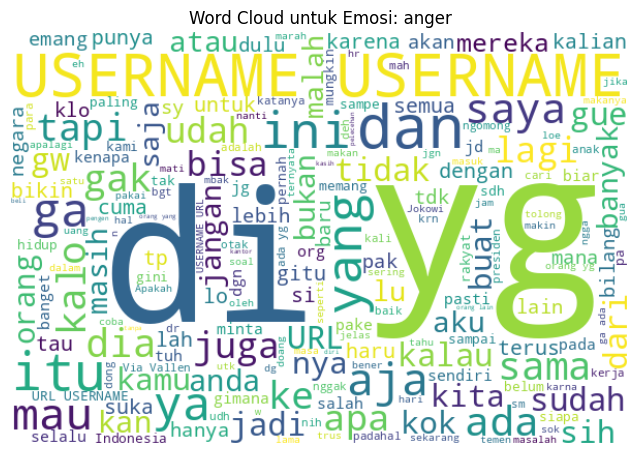

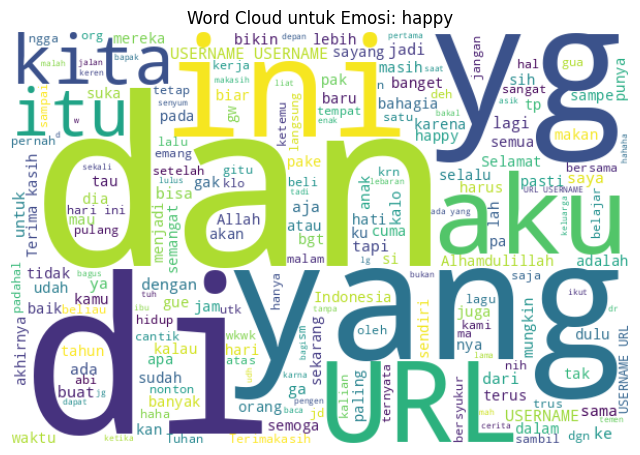

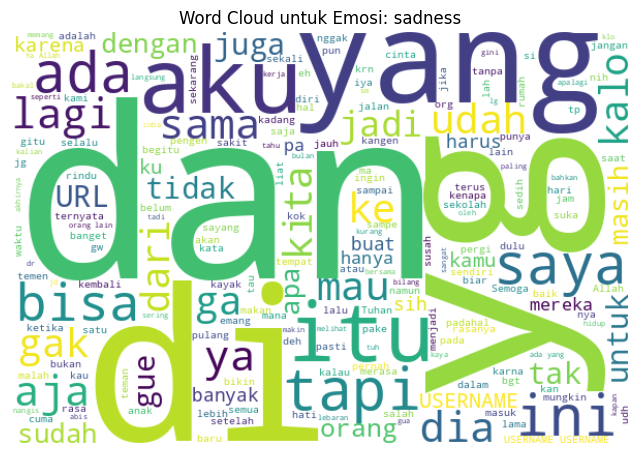

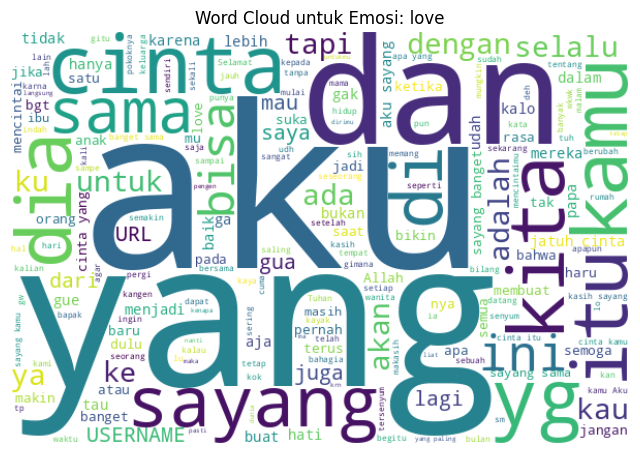

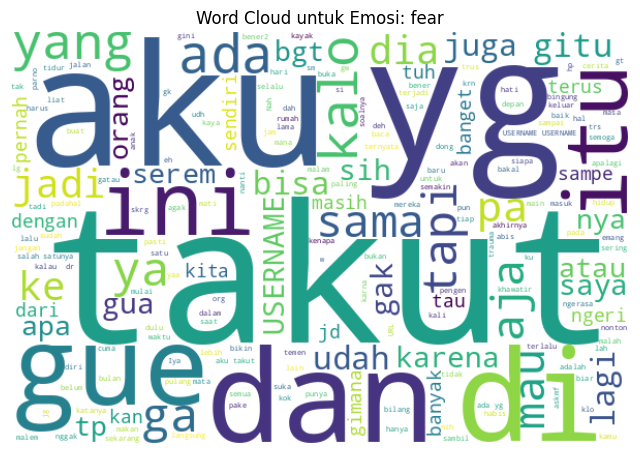

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['tweet'])
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Emosi: {label}')
    plt.show()

In [ ]:
print("\n🔍 Jumlah Duplikasi:", df.duplicated().sum())
print("\n🧹 Data Null:\n", df.isnull().sum())


🔍 Jumlah Duplikasi: 11

🧹 Data Null:
 label            0
tweet            0
label_encoded    0
char_count       0
word_count       0
dtype: int64


In [ ]:
from textblob import TextBlob
df['sentiment_polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df.groupby('label')['sentiment_polarity'].mean())

label
anger      0.023814
fear      -0.036798
happy      0.097911
love       0.071709
sadness   -0.029051
Name: sentiment_polarity, dtype: float64


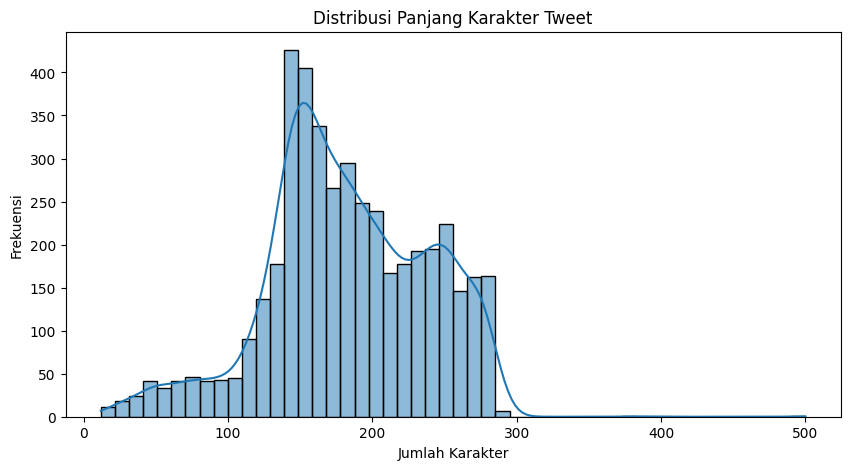

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['char_count'], bins=50, kde=True)
plt.title('Distribusi Panjang Karakter Tweet')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

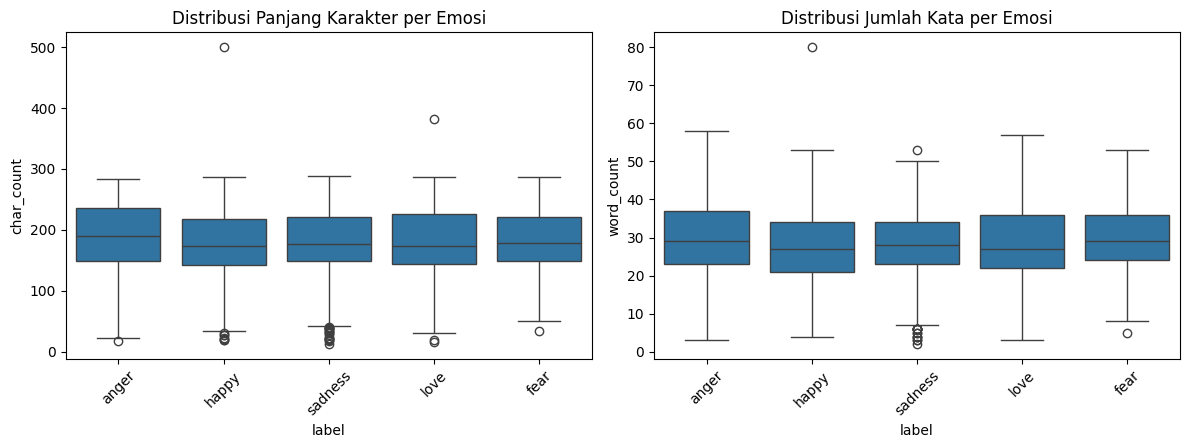

In [ ]:
# Jika ada timestamp, analisis pola waktu
# Analisis panjang tweet per emosi dengan visualisasi yang lebih detail
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='label', y='char_count')
plt.xticks(rotation=45)
plt.title('Distribusi Panjang Karakter per Emosi')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='label', y='word_count')
plt.xticks(rotation=45)
plt.title('Distribusi Jumlah Kata per Emosi')

plt.tight_layout()
plt.show()

In [ ]:
import re
from collections import Counter

# Analisis penggunaan tanda baca per emosi
def count_punctuation(text):
    return len(re.findall(r'[!?.,;:]', text))

def count_exclamation(text):
    return text.count('!')

def count_question(text):
    return text.count('?')

df['punctuation_count'] = df['tweet'].apply(count_punctuation)
df['exclamation_count'] = df['tweet'].apply(count_exclamation)
df['question_count'] = df['tweet'].apply(count_question)

print("Rata-rata penggunaan tanda baca per emosi:")
print(df.groupby('label')[['punctuation_count', 'exclamation_count', 'question_count']].mean())

Rata-rata penggunaan tanda baca per emosi:
         punctuation_count  exclamation_count  question_count
label                                                        
anger             5.396004           0.360581        0.540418
fear              4.268105           0.086287        0.269646
happy             4.265487           0.202557        0.128810
love              4.259027           0.156986        0.130298
sadness           4.154463           0.077232        0.168506


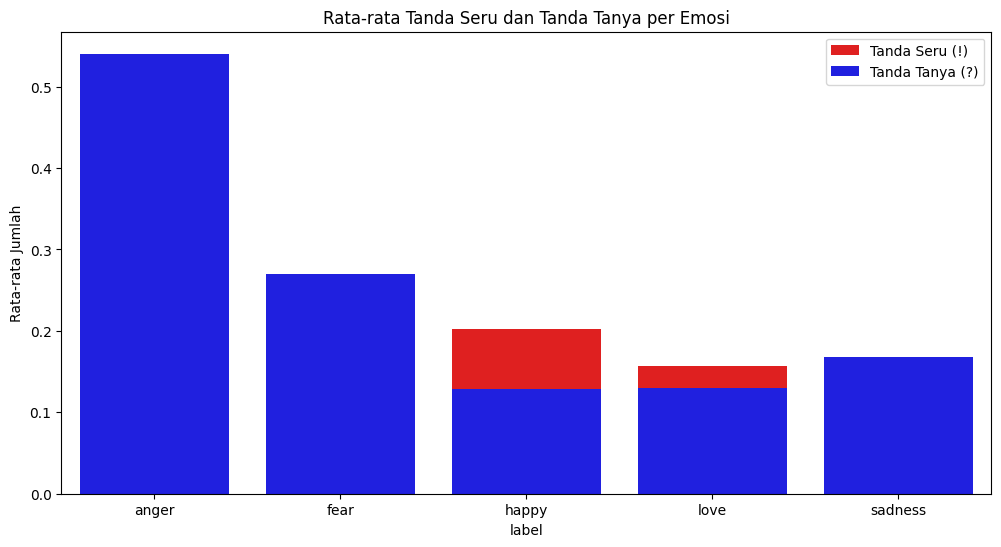

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('label')[['exclamation_count', 'question_count']].mean().reset_index(),
            x='label', y='exclamation_count', color='red', label='Tanda Seru (!)')
sns.barplot(data=df.groupby('label')[['exclamation_count', 'question_count']].mean().reset_index(),
            x='label', y='question_count', color='blue', label='Tanda Tanya (?)')
plt.title('Rata-rata Tanda Seru dan Tanda Tanya per Emosi')
plt.ylabel('Rata-rata Jumlah')
plt.legend()
plt.show()


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.2 MB/s eta 0:00:00


In [ ]:
import emoji

def count_emojis(text):
    return len([c for c in text if c in emoji.EMOJI_DATA])

def count_hashtags(text):
    return len(re.findall(r'#\w+', text))

def count_mentions(text):
    return len(re.findall(r'@\w+', text))

def count_urls(text):
    return len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))

df['emoji_count'] = df['tweet'].apply(count_emojis)
df['hashtag_count'] = df['tweet'].apply(count_hashtags)
df['mention_count'] = df['tweet'].apply(count_mentions)
df['url_count'] = df['tweet'].apply(count_urls)

print("Penggunaan elemen khusus per emosi:")
print(df.groupby('label')[['emoji_count', 'hashtag_count', 'mention_count', 'url_count']].mean())

Penggunaan elemen khusus per emosi:
         emoji_count  hashtag_count  mention_count  url_count
label                                                        
anger            0.0       0.086285       0.007266        0.0
fear             0.0       0.055470       0.001541        0.0
happy            0.0       0.373648       0.006883        0.0
love             0.0       0.120879       0.001570        0.0
sadness          0.0       0.134403       0.002006        0.0


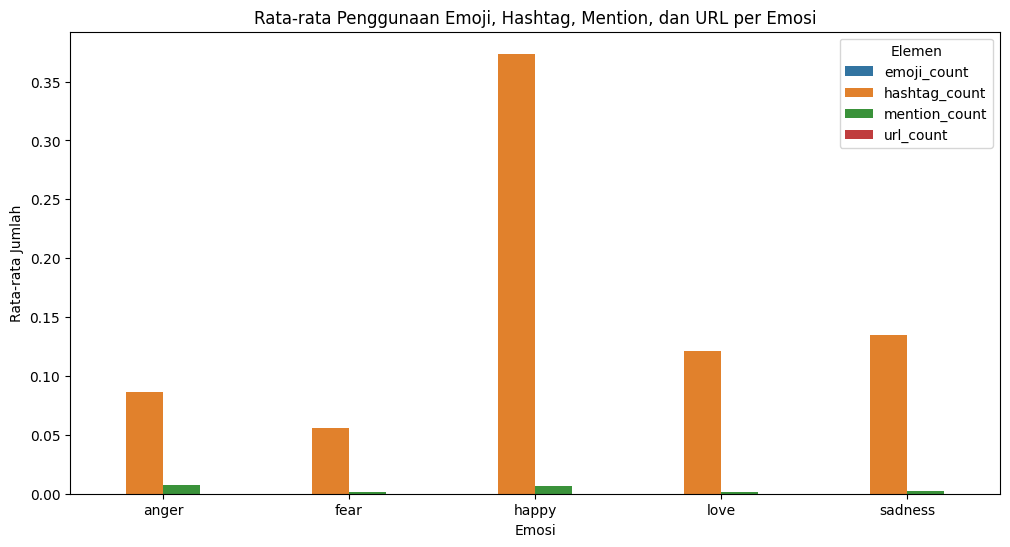

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_special = df.groupby('label')[['emoji_count', 'hashtag_count', 'mention_count', 'url_count']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_special.melt(id_vars='label'), x='label', y='value', hue='variable')
plt.title('Rata-rata Penggunaan Emoji, Hashtag, Mention, dan URL per Emosi')
plt.ylabel('Rata-rata Jumlah')
plt.xlabel('Emosi')
plt.legend(title='Elemen')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Analisis bigram dan trigram paling umum per emosi
def get_top_ngrams(texts, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english', max_features=1000)
    ngrams = vectorizer.fit_transform(texts)
    sum_ngrams = ngrams.sum(axis=0)
    ngram_freq = [(word, sum_ngrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(ngram_freq, key = lambda x: x[1], reverse=True)[:top_k]

for emotion in df['label'].unique():
    emotion_tweets = df[df['label'] == emotion]['tweet'].values
    print(f"\nTop 10 Bigrams untuk {emotion}:")
    top_bigrams = get_top_ngrams(emotion_tweets, n=2)
    for bigram, freq in top_bigrams:
        print(f"  {bigram}: {freq}")


Top 10 Bigrams untuk anger:
  username username: 371
  ada yg: 33
  orang yg: 25
  username url: 23
  ga ada: 23
  orang lain: 22
  orang yang: 22
  sexual harassment: 18
  ada yang: 17
  yg di: 15

Top 10 Bigrams untuk happy:
  username username: 143
  terima kasih: 47
  username url: 31
  hari ini: 30
  ada yang: 24
  orang yang: 20
  apa yang: 17
  sehat selalu: 17
  ada yg: 14
  ulang tahun: 14

Top 10 Bigrams untuk sadness:
  username username: 64
  orang lain: 27
  ada yang: 27
  ya allah: 22
  orang yang: 19
  hal yang: 16
  ga ada: 14
  hari ini: 14
  salah satu: 13
  lebih baik: 13

Top 10 Bigrams untuk love:
  jatuh cinta: 64
  aku sayang: 44
  sayang banget: 34
  cinta yang: 31
  sayang sama: 29
  aku cinta: 27
  kasih sayang: 27
  banget sama: 26
  kamu aku: 24
  sayang kamu: 21

Top 10 Bigrams untuk fear:
  username username: 44
  aku takut: 30
  ada yg: 21
  gue takut: 17
  salah satunya: 15
  takut kalo: 15
  jadi takut: 14
  ya allah: 13
  orang yg: 13
  allaah swt: 13

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.7 MB/s eta 0:00:00


In [ ]:
from textstat import flesch_reading_ease, flesch_kincaid_grade

def calculate_readability(text):
    try:
        return flesch_reading_ease(text)
    except:
        return 0

df['readability_score'] = df['tweet'].apply(calculate_readability)
print("Skor keterbacaan rata-rata per emosi:")
print(df.groupby('label')['readability_score'].mean())

Skor keterbacaan rata-rata per emosi:
label
anger      53.269923
fear       57.737177
happy      47.732304
love       52.641885
sadness    53.836568
Name: readability_score, dtype: float64


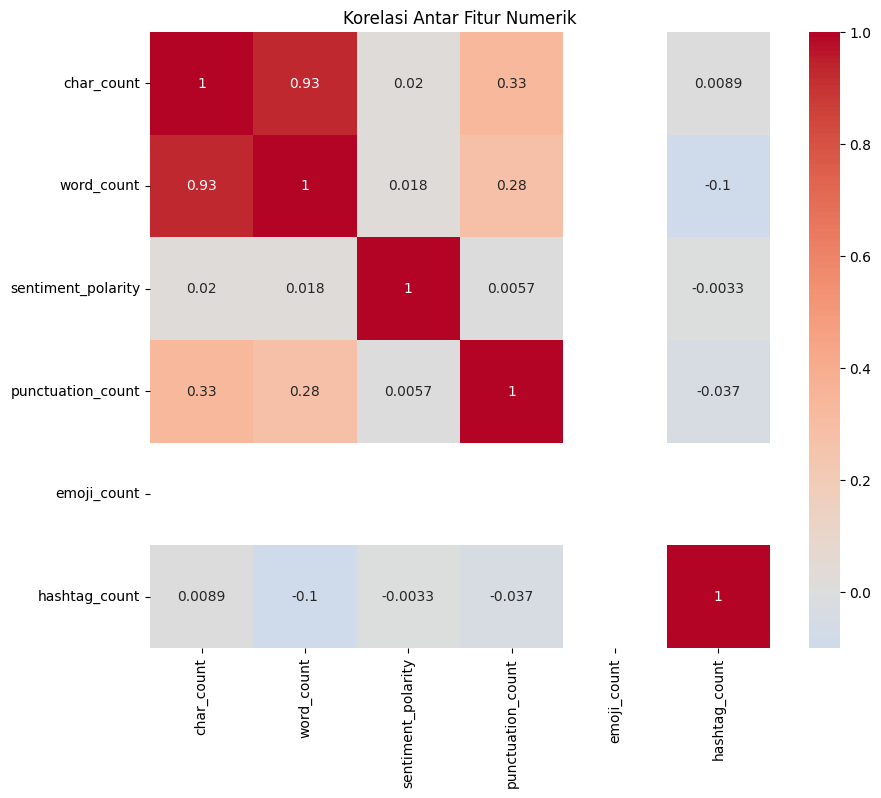

In [ ]:
# Buat correlation matrix untuk fitur numerik
numeric_features = ['char_count', 'word_count', 'sentiment_polarity',
                   'punctuation_count', 'emoji_count', 'hashtag_count']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

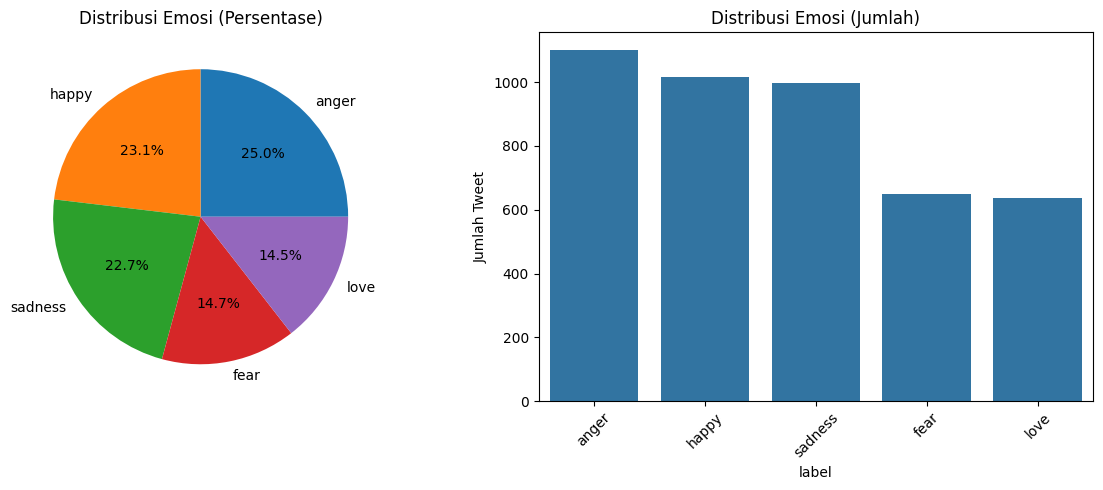

Imbalance Ratio: 1.73


In [ ]:
# Visualisasi distribusi dengan persentase
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
emotion_counts = df['label'].value_counts()
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Emosi (Persentase)')

plt.subplot(1, 2, 2)
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.xticks(rotation=45)
plt.title('Distribusi Emosi (Jumlah)')
plt.ylabel('Jumlah Tweet')

plt.tight_layout()
plt.show()

# Hitung imbalance ratio
max_count = emotion_counts.max()
min_count = emotion_counts.min()
print(f"Imbalance Ratio: {max_count/min_count:.2f}")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF untuk menemukan kata-kata yang paling membedakan antar emosi
def get_discriminative_words(df, emotion, top_k=15):
    emotion_texts = df[df['label'] == emotion]['tweet']
    other_texts = df[df['label'] != emotion]['tweet']

    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

    # Gabungkan semua teks
    all_texts = list(emotion_texts) + list(other_texts)
    labels = [1] * len(emotion_texts) + [0] * len(other_texts)

    tfidf_matrix = vectorizer.fit_transform(all_texts)
    feature_names = vectorizer.get_feature_names_out()

    # Hitung rata-rata TF-IDF untuk setiap kelas
    emotion_mean = tfidf_matrix[:len(emotion_texts)].mean(axis=0).A1
    other_mean = tfidf_matrix[len(emotion_texts):].mean(axis=0).A1

    # Hitung perbedaan
    diff = emotion_mean - other_mean

    # Dapatkan top kata
    top_indices = diff.argsort()[-top_k:][::-1]

    return [(feature_names[i], diff[i]) for i in top_indices]

for emotion in df['label'].unique():
    print(f"\nKata-kata diskriminatif untuk {emotion}:")
    discriminative_words = get_discriminative_words(df, emotion)
    for word, score in discriminative_words:
        print(f"  {word}: {score:.4f}")


Kata-kata diskriminatif untuk anger:
  username: 0.0516
  yg: 0.0194
  ga: 0.0147
  anda: 0.0147
  kok: 0.0120
  lu: 0.0118
  mau: 0.0092
  gak: 0.0092
  saja: 0.0089
  gw: 0.0086
  tidak: 0.0085
  negara: 0.0084
  orang: 0.0084
  lo: 0.0083
  kalau: 0.0082

Kata-kata diskriminatif untuk happy:
  alhamdulillah: 0.0179
  url: 0.0169
  selamat: 0.0150
  semoga: 0.0133
  happy: 0.0129
  terima: 0.0124
  username: 0.0108
  tahun: 0.0098
  kasih: 0.0097
  bahagia: 0.0095
  terimakasih: 0.0089
  ini: 0.0088
  sehat: 0.0083
  buat: 0.0079
  dan: 0.0078

Kata-kata diskriminatif untuk sadness:
  tak: 0.0104
  rindu: 0.0089
  tapi: 0.0088
  sedih: 0.0085
  sakit: 0.0081
  saya: 0.0071
  iya: 0.0064
  yang: 0.0058
  tidak: 0.0058
  lagi: 0.0055
  pengen: 0.0054
  kangen: 0.0053
  masih: 0.0050
  sekarang: 0.0050
  mungkin: 0.0049

Kata-kata diskriminatif untuk love:
  cinta: 0.0825
  sayang: 0.0787
  aku: 0.0591
  kamu: 0.0408
  jatuh: 0.0272
  yang: 0.0235
  kau: 0.0211
  kita: 0.0206
  sama: 0

In [ ]:
# Deteksi outliers berdasarkan panjang tweet
Q1 = df['char_count'].quantile(0.25)
Q3 = df['char_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['char_count'] < lower_bound) | (df['char_count'] > upper_bound)]
print(f"Jumlah outliers berdasarkan panjang karakter: {len(outliers)}")
print("\nContoh outliers:")
print(outliers[['tweet', 'label', 'char_count']].head())

Jumlah outliers berdasarkan panjang karakter: 26

Contoh outliers:
                                                  tweet  label  char_count
163                             ngakak ane liatnya wkwk  happy          23
477   Aku tak mudah untuk mencintai, aku tak mudah m...   love         382
1182                                oke terima kasih :)  happy          19
1190                       selamat sore raper tampan :)  happy          28
1194                                wkwk oke baiklah :D  happy          19


# ***EDA Analysis:***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from textblob import TextBlob

# ===== 1. ANALISIS PANJANG SEQUENCE UNTUK BiLSTM =====
def analyze_sequence_length(df):
    """Analisis panjang sequence untuk menentukan max_length BiLSTM"""
    print("="*60)
    print("📏 ANALISIS PANJANG SEQUENCE UNTUK BiLSTM")
    print("="*60)

    # Statistik panjang kata
    word_lengths = df['tweet'].apply(lambda x: len(x.split()))
    char_lengths = df['tweet'].apply(len)

    print(f"📊 Statistik Panjang Kata:")
    print(f"   • Mean: {word_lengths.mean():.2f}")
    print(f"   • Median: {word_lengths.median():.2f}")
    print(f"   • Std: {word_lengths.std():.2f}")
    print(f"   • Min: {word_lengths.min()}")
    print(f"   • Max: {word_lengths.max()}")

    # Percentile analysis untuk menentukan max_length optimal
    percentiles = [50, 75, 85, 90, 95, 99]
    print(f"\n📈 Percentile Analysis (untuk menentukan max_length):")
    for p in percentiles:
        val = np.percentile(word_lengths, p)
        coverage = (word_lengths <= val).mean() * 100
        print(f"   • {p}th percentile: {val:.0f} kata (covers {coverage:.1f}% data)")

    # Rekomendasi max_length
    recommended_length = int(np.percentile(word_lengths, 95))
    print(f"\n✅ REKOMENDASI: max_sequence_length = {recommended_length}")

    # Visualisasi
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(word_lengths, bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(recommended_length, color='red', linestyle='--', label=f'Recommended: {recommended_length}')
    plt.xlabel('Jumlah Kata')
    plt.ylabel('Frekuensi')
    plt.title('Distribusi Panjang Tweet (Kata)')
    plt.legend()

    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='label', y='word_count')
    plt.xticks(rotation=45)
    plt.title('Panjang Tweet per Emosi')

    plt.subplot(1, 3, 3)
    # Cumulative distribution
    sorted_lengths = np.sort(word_lengths)
    cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    plt.plot(sorted_lengths, cumulative)
    plt.axvline(recommended_length, color='red', linestyle='--', label=f'95th percentile: {recommended_length}')
    plt.xlabel('Panjang Tweet (Kata)')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Distribution')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return recommended_length

# ===== 2. ANALISIS CLASS IMBALANCE =====
def analyze_class_balance(df):
    """Analisis ketimpangan kelas untuk strategi sampling"""
    print("\n" + "="*60)
    print("⚖️ ANALISIS CLASS IMBALANCE")
    print("="*60)

    label_counts = df['label'].value_counts()
    total_samples = len(df)

    print("📊 Distribusi Kelas:")
    for label, count in label_counts.items():
        percentage = (count / total_samples) * 100
        print(f"   • {label}: {count} samples ({percentage:.2f}%)")

    # Imbalance ratio
    max_count = label_counts.max()
    min_count = label_counts.min()
    imbalance_ratio = max_count / min_count

    print(f"\n📈 Imbalance Metrics:")
    print(f"   • Imbalance Ratio: {imbalance_ratio:.2f}")
    print(f"   • Majority Class: {label_counts.index[0]} ({max_count} samples)")
    print(f"   • Minority Class: {label_counts.index[-1]} ({min_count} samples)")

    # Rekomendasi strategi
    if imbalance_ratio > 3:
        print(f"\n⚠️  SEVERE IMBALANCE detected!")
        print(f"   ✅ Recommended: Use class_weight='balanced' in model")
        print(f"   ✅ Alternative: Apply SMOTE or undersampling")
    elif imbalance_ratio > 1.5:
        print(f"\n⚠️  MODERATE IMBALANCE detected!")
        print(f"   ✅ Recommended: Use class_weight='balanced'")
    else:
        print(f"\n✅ BALANCED dataset - no special handling needed")

    return imbalance_ratio, label_counts

# ===== 3. ANALISIS NOISE & KARAKTER KHUSUS =====
def analyze_text_noise(df):
    """Analisis noise dalam teks untuk strategi preprocessing"""
    print("\n" + "="*60)
    print("🧹 ANALISIS NOISE & KARAKTER KHUSUS")
    print("="*60)

    # Count various text elements
    noise_stats = {}

    # URLs
    df['url_count'] = df['tweet'].apply(lambda x: len(re.findall(r'http[s]?://\S+|www\.\S+', x)))
    noise_stats['URLs'] = df['url_count'].sum()

    # Mentions (@username)
    df['mention_count'] = df['tweet'].apply(lambda x: len(re.findall(r'@\w+', x)))
    noise_stats['Mentions'] = df['mention_count'].sum()

    # Hashtags
    df['hashtag_count'] = df['tweet'].apply(lambda x: len(re.findall(r'#\w+', x)))
    noise_stats['Hashtags'] = df['hashtag_count'].sum()

    # Repeated punctuation
    df['repeated_punct'] = df['tweet'].apply(lambda x: len(re.findall(r'[!]{2,}|[?]{2,}|[.]{3,}', x)))
    noise_stats['Repeated Punctuation'] = df['repeated_punct'].sum()

    # Numbers
    df['number_count'] = df['tweet'].apply(lambda x: len(re.findall(r'\d+', x)))
    noise_stats['Numbers'] = df['number_count'].sum()

    # Special characters
    df['special_char_count'] = df['tweet'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))

    print("📊 Noise Statistics:")
    total_tweets = len(df)
    for noise_type, count in noise_stats.items():
        percentage = (count / total_tweets) * 100
        print(f"   • {noise_type}: {count} occurrences ({percentage:.2f}% of tweets)")

    # Analisis per emosi
    print(f"\n📈 Noise Distribution per Emotion:")
    noise_cols = ['url_count', 'mention_count', 'hashtag_count', 'repeated_punct', 'number_count']
    noise_by_emotion = df.groupby('label')[noise_cols].mean()
    print(noise_by_emotion.round(3))

    # Rekomendasi preprocessing
    print(f"\n✅ PREPROCESSING RECOMMENDATIONS:")
    if noise_stats['URLs'] > total_tweets * 0.1:
        print(f"   • REMOVE/REPLACE URLs (high frequency)")
    else:
        print(f"   • URLs: Low frequency, can remove")

    if noise_stats['Mentions'] > total_tweets * 0.1:
        print(f"   • NORMALIZE mentions to <USER> token")
    else:
        print(f"   • Mentions: Can remove or keep")

    if noise_stats['Hashtags'] > total_tweets * 0.1:
        print(f"   • KEEP hashtags but remove # symbol (contains semantic info)")
    else:
        print(f"   • Hashtags: Low frequency, can remove # symbol")

    print(f"   • NORMALIZE repeated punctuation (!! → !)")
    print(f"   • CONVERT numbers to <NUMBER> token or remove")

    return noise_stats

# ===== 4. ANALISIS VOCABULARY =====
def analyze_vocabulary(df):
    """Analisis vocabulary untuk menentukan vocab_size dan threshold"""
    print("\n" + "="*60)
    print("📚 ANALISIS VOCABULARY")
    print("="*60)

    # Tokenize semua teks
    all_words = []
    for text in df['tweet']:
        words = text.lower().split()
        all_words.extend(words)

    # Count frequency
    word_freq = Counter(all_words)
    vocab_size = len(word_freq)
    total_words = len(all_words)

    print(f"📊 Vocabulary Statistics:")
    print(f"   • Total unique words: {vocab_size:,}")
    print(f"   • Total word occurrences: {total_words:,}")
    print(f"   • Average word frequency: {total_words/vocab_size:.2f}")

    # Frequency distribution analysis
    freq_counts = Counter(word_freq.values())
    singletons = freq_counts[1]  # Words that appear only once

    print(f"\n📈 Frequency Distribution:")
    print(f"   • Words appearing once (singletons): {singletons} ({singletons/vocab_size*100:.1f}%)")
    print(f"   • Words appearing 2-5 times: {sum(freq_counts[i] for i in range(2, 6) if i in freq_counts)}")
    print(f"   • Words appearing >5 times: {sum(freq_counts[i] for i in freq_counts if i > 5)}")

    # Coverage analysis
    most_common = word_freq.most_common()
    cumulative_freq = 0
    coverage_points = [0.5, 0.7, 0.8, 0.9, 0.95]

    print(f"\n📈 Vocabulary Coverage Analysis:")
    for coverage in coverage_points:
        target_freq = total_words * coverage
        for i, (word, freq) in enumerate(most_common):
            cumulative_freq += freq
            if cumulative_freq >= target_freq:
                vocab_needed = i + 1
                print(f"   • {coverage*100}% coverage: {vocab_needed:,} words needed")
                break
        cumulative_freq = 0

    # Rekomendasi
    recommended_vocab_size = None
    cumulative_freq = 0
    for i, (word, freq) in enumerate(most_common):
        cumulative_freq += freq
        if cumulative_freq >= total_words * 0.95:  # 95% coverage
            recommended_vocab_size = i + 1
            break

    print(f"\n✅ RECOMMENDATIONS:")
    print(f"   • Recommended vocab_size: {recommended_vocab_size:,} (95% coverage)")
    print(f"   • Min word frequency threshold: 2 (remove singletons)")
    print(f"   • OOV strategy: Use <UNK> token for rare words")

    return recommended_vocab_size, word_freq

# ===== 5. ANALISIS SENTIMENT CONSISTENCY =====
def analyze_sentiment_consistency(df):
    """Analisis konsistensi antara sentiment polarity dan label emosi"""
    print("\n" + "="*60)
    print("🎭 ANALISIS SENTIMENT CONSISTENCY")
    print("="*60)

    # Hitung sentiment polarity jika belum ada
    if 'sentiment_polarity' not in df.columns:
        df['sentiment_polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Kategorikan sentiment
    def categorize_sentiment(polarity):
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'

    df['sentiment_category'] = df['sentiment_polarity'].apply(categorize_sentiment)

    # Analisis per emosi
    print("📊 Average Sentiment Polarity per Emotion:")
    avg_sentiment = df.groupby('label')['sentiment_polarity'].agg(['mean', 'std', 'count'])
    print(avg_sentiment.round(4))

    # Cross-tabulation
    print(f"\n📈 Sentiment vs Emotion Cross-tabulation:")
    cross_tab = pd.crosstab(df['label'], df['sentiment_category'], normalize='index') * 100
    print(cross_tab.round(1))

    # Detect inconsistencies
    print(f"\n⚠️  POTENTIAL INCONSISTENCIES:")
    for emotion in df['label'].unique():
        emotion_data = df[df['label'] == emotion]
        avg_pol = emotion_data['sentiment_polarity'].mean()

        if emotion in ['happy', 'joy', 'excitement'] and avg_pol < 0:
            print(f"   • {emotion}: Expected positive but avg polarity = {avg_pol:.3f}")
        elif emotion in ['sad', 'anger', 'fear'] and avg_pol > 0:
            print(f"   • {emotion}: Expected negative but avg polarity = {avg_pol:.3f}")

    return cross_tab

# ===== MAIN ANALYSIS FUNCTION =====
def run_preprocessing_eda(df):
    """Jalankan semua analisis EDA yang diperlukan untuk preprocessing BiLSTM"""
    print("🔍 RUNNING EDA ANALYSIS FOR BiLSTM PREPROCESSING")
    print("="*70)

    # 1. Sequence Length Analysis
    max_length = analyze_sequence_length(df)

    # 2. Class Balance Analysis
    imbalance_ratio, label_counts = analyze_class_balance(df)

    # 3. Text Noise Analysis
    noise_stats = analyze_text_noise(df)

    # 4. Vocabulary Analysis
    vocab_size, word_freq = analyze_vocabulary(df)

    # 5. Sentiment Consistency
    sentiment_cross_tab = analyze_sentiment_consistency(df)

    # Summary recommendations
    print("\n" + "="*70)
    print("📋 SUMMARY RECOMMENDATIONS FOR BiLSTM PREPROCESSING")
    print("="*70)
    print(f"✅ max_sequence_length: {max_length}")
    print(f"✅ vocab_size: {vocab_size:,}")
    print(f"✅ min_word_freq: 2")
    print(f"✅ class_weight: {'balanced' if imbalance_ratio > 1.5 else 'None'}")
    print(f"✅ Handle noise: URLs, mentions, hashtags, repeated punctuation")
    print(f"✅ OOV strategy: <UNK> token")

    return {
        'max_length': max_length,
        'vocab_size': vocab_size,
        'imbalance_ratio': imbalance_ratio,
        'noise_stats': noise_stats,
        'word_freq': word_freq
    }


# ***Preprocessing Pipeline:***

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
import pickle

class BiLSTMPreprocessor:
    def __init__(self, max_vocab_size=10000, max_sequence_length=50, min_word_freq=2):
        self.max_vocab_size = max_vocab_size
        self.max_sequence_length = max_sequence_length
        self.min_word_freq = min_word_freq
        self.tokenizer = None
        self.label_encoder = None

    def clean_text(self, text):
        """
        Comprehensive text cleaning untuk BiLSTM
        """
        # Convert to lowercase
        text = text.lower()

        # Replace URLs dengan token khusus
        text = re.sub(r'http[s]?://\S+|www\.\S+', '<url>', text)

        # Replace mentions dengan token khusus
        text = re.sub(r'@\w+', '<user>', text)

        # Remove hashtag symbol tapi keep content
        text = re.sub(r'#(\w+)', r'\1', text)

        # Replace numbers dengan token khusus
        text = re.sub(r'\d+', '<number>', text)

        # Normalize repeated punctuation
        text = re.sub(r'([!?.]){2,}', r'\1', text)
        text = re.sub(r'([a-zA-Z])\1{2,}', r'\1\1', text)  # happyyy -> happy

        # Remove extra whitespaces
        text = ' '.join(text.split())

        # Remove special characters tapi keep basic punctuation
        text = re.sub(r'[^\w\s!?.,]', '', text)

        return text

    def minimal_clean_text(self, text):
        """
        Minimal cleaning untuk data mentah
        """
        # Hanya basic cleaning
        text = text.strip()
        text = ' '.join(text.split())  # Remove extra whitespace
        return text

    def build_vocabulary(self, texts):
        """
        Build vocabulary dengan frequency filtering
        """
        # Tokenize dan count frequency
        all_words = []
        for text in texts:
            words = text.split()
            all_words.extend(words)

        word_freq = Counter(all_words)

        # Filter berdasarkan minimum frequency
        filtered_vocab = {word: freq for word, freq in word_freq.items()
                         if freq >= self.min_word_freq}

        # Sort by frequency dan ambil top words
        vocab_items = sorted(filtered_vocab.items(), key=lambda x: x[1], reverse=True)
        vocab_words = [word for word, freq in vocab_items[:self.max_vocab_size-2]]  # -2 for <UNK> and <PAD>

        print(f"📚 Vocabulary built:")
        print(f"   • Total unique words: {len(word_freq):,}")
        print(f"   • Words after frequency filter (>={self.min_word_freq}): {len(filtered_vocab):,}")
        print(f"   • Final vocabulary size: {len(vocab_words):,}")

        return vocab_words, word_freq

    def prepare_raw_data(self, df):
        """
        Prepare data mentah dengan minimal preprocessing
        """
        print("🔧 PREPARING RAW DATA...")
        print("="*50)

        df_raw = df.copy()

        # Minimal cleaning
        df_raw['tweet_cleaned'] = df_raw['tweet'].apply(self.minimal_clean_text)

        # Encode labels
        if self.label_encoder is None:
            self.label_encoder = LabelEncoder()
            df_raw['label_encoded'] = self.label_encoder.fit_transform(df_raw['label'])
        else:
            df_raw['label_encoded'] = self.label_encoder.transform(df_raw['label'])

        # Basic statistics
        print(f"✅ Raw data prepared:")
        print(f"   • Total samples: {len(df_raw):,}")
        print(f"   • Average text length: {df_raw['tweet_cleaned'].apply(len).mean():.1f} chars")
        print(f"   • Average words: {df_raw['tweet_cleaned'].apply(lambda x: len(x.split())).mean():.1f}")

        return df_raw

    def prepare_preprocessed_data(self, df):
        """
        Prepare data dengan full preprocessing untuk BiLSTM
        """
        print("\n🔧 PREPARING PREPROCESSED DATA...")
        print("="*50)

        df_processed = df.copy()

        # Full text cleaning
        print("🧹 Applying text cleaning...")
        df_processed['tweet_cleaned'] = df_processed['tweet'].apply(self.clean_text)

        # Encode labels
        if self.label_encoder is None:
            self.label_encoder = LabelEncoder()
            df_processed['label_encoded'] = self.label_encoder.fit_transform(df_processed['label'])
        else:
            df_processed['label_encoded'] = self.label_encoder.transform(df_processed['label'])

        # Build vocabulary
        print("📚 Building vocabulary...")
        vocab_words, word_freq = self.build_vocabulary(df_processed['tweet_cleaned'].tolist())

        # Initialize tokenizer dengan vocabulary yang sudah difilter
        self.tokenizer = Tokenizer(num_words=self.max_vocab_size, oov_token='<UNK>')
        self.tokenizer.fit_on_texts(df_processed['tweet_cleaned'])

        # Convert texts to sequences
        print("🔢 Converting texts to sequences...")
        sequences = self.tokenizer.texts_to_sequences(df_processed['tweet_cleaned'])

        # Pad sequences
        print("📏 Padding sequences...")
        X_padded = pad_sequences(sequences, maxlen=self.max_sequence_length, padding='post', truncating='post')

        # Add padded sequences to dataframe
        df_processed['sequences'] = list(X_padded)

        # Statistics
        seq_lengths = [len(seq) for seq in sequences]
        coverage = (np.array(seq_lengths) <= self.max_sequence_length).mean() * 100

        print(f"✅ Preprocessed data prepared:")
        print(f"   • Total samples: {len(df_processed):,}")
        print(f"   • Vocabulary size: {len(self.tokenizer.word_index):,}")
        print(f"   • Max sequence length: {self.max_sequence_length}")
        print(f"   • Sequence coverage: {coverage:.1f}%")
        print(f"   • Average sequence length: {np.mean(seq_lengths):.1f}")

        return df_processed, X_padded

    def split_data(self, df, test_size=0.2, val_size=0.1, stratify_col='label_encoded'):
        """
        Split data menjadi train/validation/test dengan stratification
        """
        print(f"\n📊 SPLITTING DATA...")
        print("="*50)

        # Tentukan fitur dan target
        if 'sequences' in df.columns:
            X = np.vstack(df['sequences'].values)
            data_type = "preprocessed"
        else:
            X = df['tweet_cleaned'].values
            data_type = "raw"

        y = df[stratify_col].values

        # First split: train + val vs test
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        # Second split: train vs val
        val_size_adjusted = val_size / (1 - test_size)  # Adjust val_size
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_size_adjusted, random_state=42, stratify=y_temp
        )

        print(f"✅ Data split completed ({data_type}):")
        print(f"   • Training set: {len(X_train):,} samples ({len(X_train)/len(df)*100:.1f}%)")
        print(f"   • Validation set: {len(X_val):,} samples ({len(X_val)/len(df)*100:.1f}%)")
        print(f"   • Test set: {len(X_test):,} samples ({len(X_test)/len(df)*100:.1f}%)")

        # Check class distribution
        print(f"\n📈 Class distribution:")
        unique_labels = np.unique(y)
        for split_name, split_y in [('Train', y_train), ('Val', y_val), ('Test', y_test)]:
            dist = [np.sum(split_y == label) for label in unique_labels]
            dist_pct = [d/len(split_y)*100 for d in dist]
            print(f"   • {split_name}: {dist} ({[f'{p:.1f}%' for p in dist_pct]})")

        return {
            'X_train': X_train, 'X_val': X_val, 'X_test': X_test,
            'y_train': y_train, 'y_val': y_val, 'y_test': y_test
        }

    def save_preprocessor(self, filepath):
        """
        Save tokenizer dan label encoder
        """
        preprocessing_objects = {
            'tokenizer': self.tokenizer,
            'label_encoder': self.label_encoder,
            'max_vocab_size': self.max_vocab_size,
            'max_sequence_length': self.max_sequence_length,
            'min_word_freq': self.min_word_freq
        }

        with open(filepath, 'wb') as f:
            pickle.dump(preprocessing_objects, f)

        print(f"💾 Preprocessor saved to: {filepath}")

    def load_preprocessor(self, filepath):
        """
        Load tokenizer dan label encoder
        """
        with open(filepath, 'rb') as f:
            preprocessing_objects = pickle.load(f)

        self.tokenizer = preprocessing_objects['tokenizer']
        self.label_encoder = preprocessing_objects['label_encoder']
        self.max_vocab_size = preprocessing_objects['max_vocab_size']
        self.max_sequence_length = preprocessing_objects['max_sequence_length']
        self.min_word_freq = preprocessing_objects['min_word_freq']

        print(f"📂 Preprocessor loaded from: {filepath}")

def create_bilstm_datasets(df, config=None):
    """
    Main function untuk create 2 versi dataset: raw dan preprocessed
    """
    print("🚀 CREATING BiLSTM DATASETS")
    print("="*70)

    # Default configuration berdasarkan EDA
    if config is None:
        config = {
            'max_vocab_size': 10000,
            'max_sequence_length': 50,  # Sesuaikan berdasarkan EDA
            'min_word_freq': 2,
            'test_size': 0.2,
            'val_size': 0.1
        }

    # Initialize preprocessor
    preprocessor = BiLSTMPreprocessor(
        max_vocab_size=config['max_vocab_size'],
        max_sequence_length=config['max_sequence_length'],
        min_word_freq=config['min_word_freq']
    )

    # ===== 1. PREPARE RAW DATA =====
    df_raw = preprocessor.prepare_raw_data(df)
    raw_splits = preprocessor.split_data(df_raw,
                                        test_size=config['test_size'],
                                        val_size=config['val_size'])

    # ===== 2. PREPARE PREPROCESSED DATA =====
    df_processed, X_padded = preprocessor.prepare_preprocessed_data(df)
    processed_splits = preprocessor.split_data(df_processed,
                                             test_size=config['test_size'],
                                             val_size=config['val_size'])

    # ===== 3. CREATE DATASETS DICTIONARY =====
    datasets = {
        'raw': {
            'dataframe': df_raw,
            'splits': raw_splits,
            'description': 'Minimal preprocessing - hanya basic cleaning'
        },
        'preprocessed': {
            'dataframe': df_processed,
            'splits': processed_splits,
            'X_padded': X_padded,
            'description': 'Full preprocessing - siap untuk BiLSTM'
        },
        'config': config,
        'preprocessor': preprocessor
    }

    # ===== 4. SAVE PREPROCESSOR =====
    # preprocessor.save_preprocessor('bilstm_preprocessor.pkl')

    # ===== 5. SUMMARY =====
    print(f"\n" + "="*70)
    print("📋 DATASET CREATION SUMMARY")
    print("="*70)
    print(f"✅ Raw dataset: {len(df_raw):,} samples")
    print(f"✅ Preprocessed dataset: {len(df_processed):,} samples")
    print(f"✅ Vocabulary size: {len(preprocessor.tokenizer.word_index):,}")
    print(f"✅ Max sequence length: {config['max_sequence_length']}")
    print(f"✅ Number of classes: {len(preprocessor.label_encoder.classes_)}")
    print(f"✅ Classes: {list(preprocessor.label_encoder.classes_)}")

    return datasets

# ===== EXAMPLE USAGE =====
def run_example():
    config = {
        'max_vocab_size': 10000,        # Dari EDA vocabulary analysis
        'max_sequence_length': 50,      # Dari EDA sequence length analysis
        'min_word_freq': 2,             # Untuk handle rare words
        'test_size': 0.2,               # 80-10-10 split
        'val_size': 0.1
    }

    print("📝 Example code ready to use!")


🔍 RUNNING EDA ANALYSIS FOR BiLSTM PREPROCESSING
📏 ANALISIS PANJANG SEQUENCE UNTUK BiLSTM
📊 Statistik Panjang Kata:
   • Mean: 28.78
   • Median: 28.00
   • Std: 9.29
   • Min: 2
   • Max: 80

📈 Percentile Analysis (untuk menentukan max_length):
   • 50th percentile: 28 kata (covers 51.5% data)
   • 75th percentile: 35 kata (covers 75.3% data)
   • 85th percentile: 39 kata (covers 85.8% data)
   • 90th percentile: 41 kata (covers 90.4% data)
   • 95th percentile: 44 kata (covers 95.4% data)
   • 99th percentile: 49 kata (covers 99.3% data)

✅ REKOMENDASI: max_sequence_length = 44


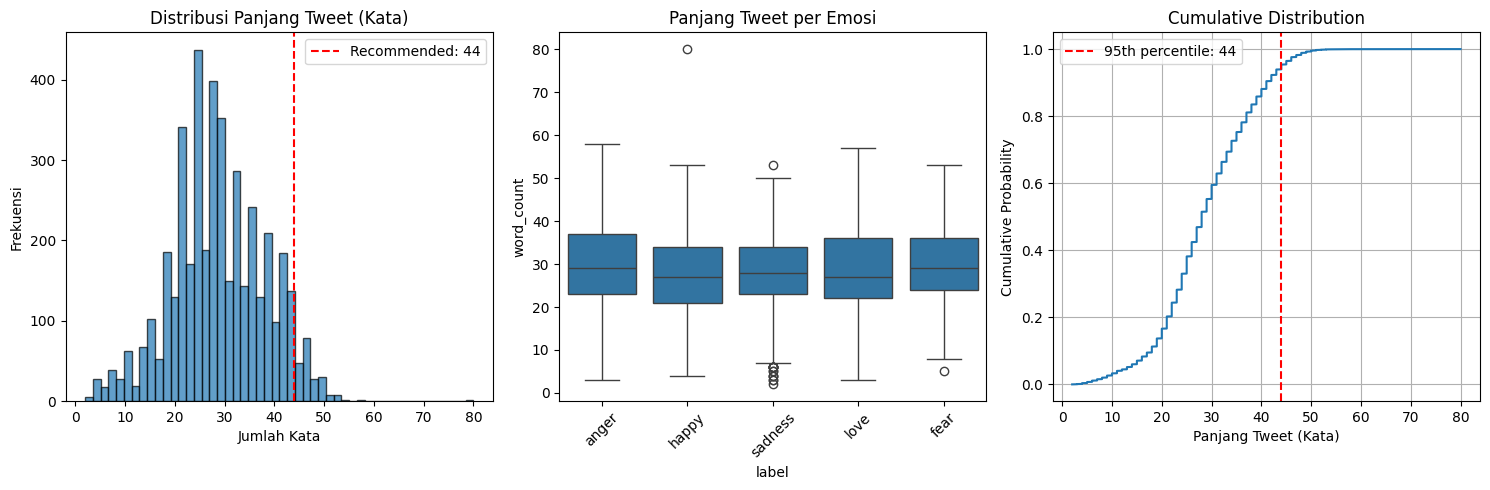


⚖️ ANALISIS CLASS IMBALANCE
📊 Distribusi Kelas:
   • anger: 1101 samples (25.02%)
   • happy: 1017 samples (23.11%)
   • sadness: 997 samples (22.65%)
   • fear: 649 samples (14.75%)
   • love: 637 samples (14.47%)

📈 Imbalance Metrics:
   • Imbalance Ratio: 1.73
   • Majority Class: anger (1101 samples)
   • Minority Class: love (637 samples)

⚠️  MODERATE IMBALANCE detected!
   ✅ Recommended: Use class_weight='balanced'

🧹 ANALISIS NOISE & KARAKTER KHUSUS
📊 Noise Statistics:
   • URLs: 0 occurrences (0.00% of tweets)
   • Mentions: 19 occurrences (0.43% of tweets)
   • Hashtags: 722 occurrences (16.41% of tweets)
   • Repeated Punctuation: 1130 occurrences (25.68% of tweets)
   • Numbers: 2414 occurrences (54.85% of tweets)

📈 Noise Distribution per Emotion:
         url_count  mention_count  hashtag_count  repeated_punct  number_count
label                                                                         
anger          0.0          0.007          0.086           0.478      

In [ ]:
# 1. Jalankan EDA Analysis terlebih dahulu
preprocessing_config = run_preprocessing_eda(df)

# 2. Gunakan hasil EDA untuk konfigurasi
config = {
    'max_vocab_size': preprocessing_config['vocab_size'],        # Dari EDA
    'max_sequence_length': preprocessing_config['max_length'],   # Dari EDA
    'min_word_freq': 2,                                         # Untuk handle rare words
    'test_size': 0.2,                                           # 80-10-10 split
    'val_size': 0.1
}

# 3. Create 2 versi datasets
datasets = create_bilstm_datasets(df, config)

# 4. Akses kedua versi data
raw_data = datasets['raw']
processed_data = datasets['preprocessed']
preprocessor = datasets['preprocessor']

print("RAW DATA:")
print("- Dataframe shape:", raw_data['dataframe'].shape)
print("- Train shape:", raw_data['splits']['X_train'].shape)

print("\nPREPROCESSED DATA:")
print("- Dataframe shape:", processed_data['dataframe'].shape)
print("- Train shape:", processed_data['splits']['X_train'].shape)
print("- Padded sequences ready for BiLSTM!")

# ***Training BiLSTM***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class EmotionBiLSTM:
    def __init__(self, vocab_size, max_length, num_classes, embedding_dim=128, lstm_units=64):
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.num_classes = num_classes
        self.embedding_dim = embedding_dim
        self.lstm_units = lstm_units
        self.model = None
        self.history = None

    def build_model(self, dropout_rate=0.3, recurrent_dropout=0.3):
        """
        Build BiLSTM model dengan architecture yang optimal untuk emotion detection
        """
        print("🏗️ Building BiLSTM Model...")
        print("="*50)

        self.model = Sequential([
            # Embedding layer
            Embedding(
                input_dim=self.vocab_size,
                output_dim=self.embedding_dim,
                input_length=self.max_length,
                mask_zero=True,  # Handle padding
                name='embedding'
            ),

            # Spatial dropout untuk regularization
            SpatialDropout1D(dropout_rate, name='spatial_dropout'),

            # Bidirectional LSTM layer
            Bidirectional(
                LSTM(
                    self.lstm_units,
                    dropout=dropout_rate,
                    recurrent_dropout=recurrent_dropout,
                    return_sequences=False,  # Hanya output terakhir
                    name='lstm'
                ),
                name='bidirectional_lstm'
            ),

            # Dense layers dengan dropout
            Dense(64, activation='relu', name='dense_1'),
            Dropout(dropout_rate, name='dropout_1'),

            Dense(32, activation='relu', name='dense_2'),
            Dropout(dropout_rate, name='dropout_2'),

            # Output layer
            Dense(self.num_classes, activation='softmax', name='output')
        ])

        # Print model architecture
        print("✅ Model architecture:")
        self.model.summary()

        return self.model

    def compile_model(self, learning_rate=0.001, class_weights=None):
        """
        Compile model dengan optimizer dan loss function
        """
        print(f"\n🔧 Compiling model...")

        # Optimizer
        optimizer = Adam(learning_rate=learning_rate)

        # Loss function
        if self.num_classes == 2:
            loss = 'binary_crossentropy'
            metrics = ['accuracy']
        else:
            loss = 'sparse_categorical_crossentropy'  # Untuk integer labels
            metrics = ['accuracy']

        self.model.compile(
            optimizer=optimizer,
            loss=loss,
            metrics=metrics
        )

        print(f"✅ Model compiled:")
        print(f"   • Optimizer: Adam (lr={learning_rate})")
        print(f"   • Loss: {loss}")
        print(f"   • Metrics: {metrics}")

        if class_weights is not None:
            print(f"   • Class weights: {class_weights}")

    def prepare_callbacks(self, patience=5, min_delta=0.001):
        """
        Setup callbacks untuk training
        """
        callbacks = [
            EarlyStopping(
                monitor='val_accuracy',
                patience=patience,
                min_delta=min_delta,
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=3,
                min_lr=1e-7,
                verbose=1
            ),
            ModelCheckpoint(
                'best_bilstm_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        return callbacks

    def calculate_class_weights(self, y_train):
        """
        Hitung class weights untuk handle imbalanced data
        """
        print("⚖️ Calculating class weights...")

        # Compute class weights
        classes = np.unique(y_train)
        class_weights = compute_class_weight(
            'balanced',
            classes=classes,
            y=y_train
        )

        class_weight_dict = dict(zip(classes, class_weights))

        print("✅ Class weights calculated:")
        for cls, weight in class_weight_dict.items():
            print(f"   • Class {cls}: {weight:.3f}")

        return class_weight_dict

    def train_model(self, X_train, y_train, X_val, y_val,
                   epochs=50, batch_size=32, use_class_weights=True):
        """
        Train BiLSTM model
        """
        print(f"\n🚀 Training BiLSTM Model...")
        print("="*50)

        # Calculate class weights jika diperlukan
        class_weights = None
        if use_class_weights:
            class_weights = self.calculate_class_weights(y_train)

        # Prepare callbacks
        callbacks = self.prepare_callbacks()

        # Train model
        print(f"🏋️ Starting training...")
        print(f"   • Training samples: {len(X_train):,}")
        print(f"   • Validation samples: {len(X_val):,}")
        print(f"   • Epochs: {epochs}")
        print(f"   • Batch size: {batch_size}")

        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            class_weight=class_weights,
            callbacks=callbacks,
            verbose=1
        )

        print("✅ Training completed!")

        return self.history

    def evaluate_model(self, X_test, y_test, label_encoder=None):
        """
        Evaluate model pada test set
        """
        print(f"\n📊 Evaluating Model...")
        print("="*50)

        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)

        # Test accuracy
        test_loss, test_accuracy = self.model.evaluate(X_test, y_test, verbose=0)

        print(f"✅ Test Results:")
        print(f"   • Test Loss: {test_loss:.4f}")
        print(f"   • Test Accuracy: {test_accuracy:.4f}")

        # Classification report
        if label_encoder is not None:
            target_names = label_encoder.classes_
        else:
            target_names = [f'Class_{i}' for i in range(self.num_classes)]

        print(f"\n📈 Classification Report:")
        print(classification_report(y_test, y_pred, target_names=target_names))

        # Confusion Matrix
        self.plot_confusion_matrix(y_test, y_pred, target_names)

        return {
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

    def plot_training_history(self):
        """
        Plot training history
        """
        if self.history is None:
            print("❌ No training history found!")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Plot accuracy
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy', marker='o')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy', marker='s')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)

        # Plot loss
        ax2.plot(self.history.history['loss'], label='Training Loss', marker='o')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss', marker='s')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

        # Print best epoch info
        best_epoch = np.argmax(self.history.history['val_accuracy'])
        best_val_acc = max(self.history.history['val_accuracy'])

        print(f"📈 Training Summary:")
        print(f"   • Best Validation Accuracy: {best_val_acc:.4f} (Epoch {best_epoch + 1})")
        print(f"   • Final Training Accuracy: {self.history.history['accuracy'][-1]:.4f}")
        print(f"   • Final Validation Accuracy: {self.history.history['val_accuracy'][-1]:.4f}")

    def plot_confusion_matrix(self, y_true, y_pred, class_names):
        """
        Plot confusion matrix
        """
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names
        )
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    def predict_emotion(self, texts, preprocessor):
        """
        Predict emotion untuk teks baru
        """
        # Preprocess texts
        cleaned_texts = [preprocessor.clean_text(text) for text in texts]

        # Convert to sequences
        sequences = preprocessor.tokenizer.texts_to_sequences(cleaned_texts)

        # Pad sequences
        from tensorflow.keras.preprocessing.sequence import pad_sequences
        X_padded = pad_sequences(sequences, maxlen=self.max_length, padding='post')

        # Predict
        predictions = self.model.predict(X_padded)
        predicted_classes = np.argmax(predictions, axis=1)

        # Convert back to labels
        predicted_emotions = preprocessor.label_encoder.inverse_transform(predicted_classes)

        results = []
        for i, text in enumerate(texts):
            results.append({
                'text': text,
                'predicted_emotion': predicted_emotions[i],
                'confidence': float(np.max(predictions[i])),
                'probabilities': {
                    emotion: float(prob)
                    for emotion, prob in zip(preprocessor.label_encoder.classes_, predictions[i])
                }
            })

        return results

# ===== COMPLETE TRAINING PIPELINE =====
def train_emotion_bilstm(datasets, model_config=None):
    """
    Complete pipeline untuk training BiLSTM emotion detection
    """
    print("🚀 STARTING BiLSTM EMOTION DETECTION TRAINING")
    print("="*70)

    # Extract data
    processed_data = datasets['preprocessed']
    preprocessor = datasets['preprocessor']

    X_train = processed_data['splits']['X_train']
    y_train = processed_data['splits']['y_train']
    X_val = processed_data['splits']['X_val']
    y_val = processed_data['splits']['y_val']
    X_test = processed_data['splits']['X_test']
    y_test = processed_data['splits']['y_test']

    # Model parameters
    vocab_size = len(preprocessor.tokenizer.word_index) + 1
    max_length = datasets['config']['max_sequence_length']
    num_classes = len(preprocessor.label_encoder.classes_)

    print(f"📊 Model Parameters:")
    print(f"   • Vocabulary size: {vocab_size:,}")
    print(f"   • Max sequence length: {max_length}")
    print(f"   • Number of classes: {num_classes}")
    print(f"   • Classes: {list(preprocessor.label_encoder.classes_)}")

    # Default model config
    if model_config is None:
        model_config = {
            'embedding_dim': 128,
            'lstm_units': 64,
            'dropout_rate': 0.3,
            'learning_rate': 0.001,
            'epochs': 50,
            'batch_size': 32
        }

    # Build and train model
    bilstm = EmotionBiLSTM(vocab_size, max_length, num_classes,
                          model_config['embedding_dim'], model_config['lstm_units'])

    # Build model
    bilstm.build_model(model_config['dropout_rate'])

    # Compile model
    bilstm.compile_model(model_config['learning_rate'])

    # Train model
    bilstm.train_model(
        X_train, y_train, X_val, y_val,
        epochs=model_config['epochs'],
        batch_size=model_config['batch_size']
    )

    # Plot training history
    bilstm.plot_training_history()

    # Evaluate model
    results = bilstm.evaluate_model(X_test, y_test, preprocessor.label_encoder)

    return bilstm, results

🚀 CREATING BiLSTM DATASETS
🔧 PREPARING RAW DATA...
✅ Raw data prepared:
   • Total samples: 4,401
   • Average text length: 182.3 chars
   • Average words: 28.8

📊 SPLITTING DATA...
✅ Data split completed (raw):
   • Training set: 3,080 samples (70.0%)
   • Validation set: 440 samples (10.0%)
   • Test set: 881 samples (20.0%)

📈 Class distribution:
   • Train: [np.int64(771), np.int64(454), np.int64(711), np.int64(446), np.int64(698)] (['25.0%', '14.7%', '23.1%', '14.5%', '22.7%'])
   • Val: [np.int64(110), np.int64(65), np.int64(102), np.int64(64), np.int64(99)] (['25.0%', '14.8%', '23.2%', '14.5%', '22.5%'])
   • Test: [np.int64(220), np.int64(130), np.int64(204), np.int64(127), np.int64(200)] (['25.0%', '14.8%', '23.2%', '14.4%', '22.7%'])

🔧 PREPARING PREPROCESSED DATA...
🧹 Applying text cleaning...
📚 Building vocabulary...
📚 Vocabulary built:
   • Total unique words: 24,949
   • Words after frequency filter (>=2): 8,972
   • Final vocabulary size: 8,972
🔢 Converting texts to sequ

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout                 │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm              │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


🔧 Compiling model...
✅ Model compiled:
   • Optimizer: Adam (lr=0.001)
   • Loss: sparse_categorical_crossentropy
   • Metrics: ['accuracy']

🚀 Training BiLSTM Model...
⚖️ Calculating class weights...
✅ Class weights calculated:
   • Class 0: 0.799
   • Class 1: 1.357
   • Class 2: 0.866
   • Class 3: 1.381
   • Class 4: 0.883
🏋️ Starting training...
   • Training samples: 3,080
   • Validation samples: 440
   • Epochs: 50
   • Batch size: 32
Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.2134 - loss: 1.5993
Epoch 1: val_accuracy improved from -inf to 0.38182, saving model to best_bilstm_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 380ms/step - accuracy: 0.2137 - loss: 1.5991 - val_accuracy: 0.3818 - val_loss: 1.4303 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.3817 - loss: 1.3373
Epoch 2: val_accuracy improved from 0.38182 to 0.41818, saving model to best_bilstm_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 77s 373ms/step - accuracy: 0.3820 - loss: 1.3369 - val_accuracy: 0.4182 - val_loss: 1.2961 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.5390 - loss: 1.0167
Epoch 3: val_accuracy improved from 0.41818 to 0.59091, saving model to best_bilstm_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 37s 383ms/step - accuracy: 0.5394 - loss: 1.0162 - val_accuracy: 0.5909 - val_loss: 1.1044 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.7191 - loss: 0.6833
Epoch 4: val_accuracy did not improve from 0.59091
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 359ms/step - accuracy: 0.7194 - loss: 0.6827 - val_accuracy: 0.5818 - val_loss: 1.1435 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8739 - loss: 0.3540
Epoch 5: val_accuracy improved from 0.59091 to 0.59773, saving model to best_bilstm_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 374ms/step - accuracy: 0.8739 - loss: 0.3540 - val_accuracy: 0.5977 - val_loss: 1.1928 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9431 - loss: 0.2045
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: val_accuracy improved from 0.59773 to 0.60909, saving model to best_bilstm_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 377ms/step - accuracy: 0.9431 - loss: 0.2044 - val_accuracy: 0.6091 - val_loss: 1.4521 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.9653 - loss: 0.1260
Epoch 7: val_accuracy did not improve from 0.60909
97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 362ms/step - accuracy: 0.9654 - loss: 0.1259 - val_accuracy: 0.5841 - val_loss: 1.5187 - learning_rate: 5.0000e-04
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.9864 - loss: 0.0645
Epoch 8: val_accuracy improved from 0.60909 to 0.61591, saving model to best_bilstm_model.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 424ms/step - accuracy: 0.9863 - loss: 0.0646 - val_accuracy: 0.6159 - val_loss: 1.6033 - learning_rate: 5.0000e-04
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.9822 - loss: 0.0641
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 9: val_accuracy did not improve from 0.61591
97/97 ━━━━━━━━━━━━━━━━━━━━ 75s 355ms/step - accuracy: 0.9822 - loss: 0.0641 - val_accuracy: 0.6136 - val_loss: 1.6875 - learning_rate: 5.0000e-04
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9804 - loss: 0.0476
Epoch 10: val_accuracy did not improve from 0.61591
97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 369ms/step - accuracy: 0.9805 - loss: 0.0476 - val_accuracy: 0.6159 - val_loss: 1.7527 - learning_rate: 2.5000e-04
Epoch 11/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9959 - loss: 0.0259
Epoch 11: val_accuracy did not improve from 0.61591
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.9958 - loss: 0

97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 374ms/step - accuracy: 0.9917 - loss: 0.0483 - val_accuracy: 0.6182 - val_loss: 1.8335 - learning_rate: 2.5000e-04
Epoch 13/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9920 - loss: 0.0304
Epoch 13: val_accuracy did not improve from 0.61818
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.9920 - loss: 0.0304 - val_accuracy: 0.6023 - val_loss: 1.9155 - learning_rate: 1.2500e-04
Epoch 14/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9972 - loss: 0.0205
Epoch 14: val_accuracy did not improve from 0.61818
97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 383ms/step - accuracy: 0.9972 - loss: 0.0206 - val_accuracy: 0.6182 - val_loss: 1.8767 - learning_rate: 1.2500e-04
Epoch 15/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9950 - loss: 0.0235
Epoch 15: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 15: val_accuracy did not improve from 0.61818
97/97 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.9950 - loss:

97/97 ━━━━━━━━━━━━━━━━━━━━ 34s 354ms/step - accuracy: 0.9950 - loss: 0.0241 - val_accuracy: 0.6205 - val_loss: 1.9501 - learning_rate: 6.2500e-05
Epoch 18/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9951 - loss: 0.0184
Epoch 18: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 18: val_accuracy did not improve from 0.62045
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - accuracy: 0.9951 - loss: 0.0184 - val_accuracy: 0.6182 - val_loss: 1.9545 - learning_rate: 6.2500e-05
Epoch 19/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9962 - loss: 0.0252
Epoch 19: val_accuracy did not improve from 0.62045
97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - accuracy: 0.9962 - loss: 0.0252 - val_accuracy: 0.6114 - val_loss: 1.9597 - learning_rate: 3.1250e-05
Epoch 20/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9980 - loss: 0.0211
Epoch 20: val_accuracy did not improve from 0.62045
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 354ms/step - accuracy: 0.9980 - loss

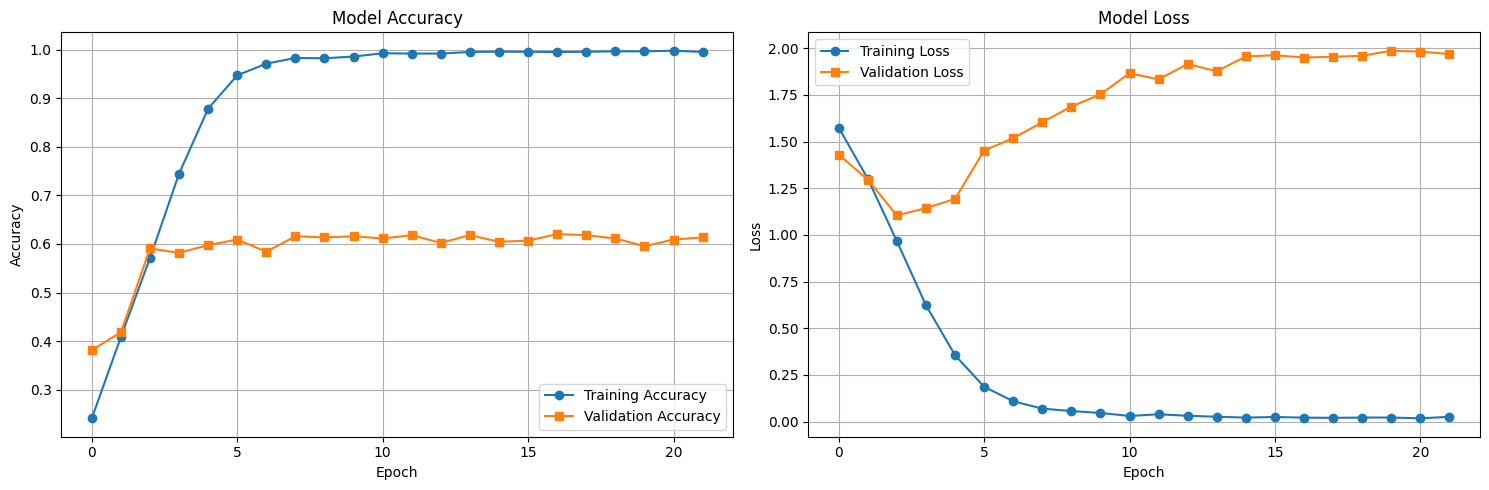

📈 Training Summary:
   • Best Validation Accuracy: 0.6205 (Epoch 17)
   • Final Training Accuracy: 0.9951
   • Final Validation Accuracy: 0.6136

📊 Evaluating Model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
✅ Test Results:
   • Test Loss: 1.9009
   • Test Accuracy: 0.6163

📈 Classification Report:
              precision    recall  f1-score   support

       anger       0.66      0.71      0.69       220
        fear       0.76      0.65      0.70       130
       happy       0.74      0.51      0.60       204
        love       0.80      0.63      0.70       127
     sadness       0.40      0.59      0.48       200

    accuracy                           0.62       881
   macro avg       0.67      0.62      0.63       881
weighted avg       0.66      0.62      0.62       881



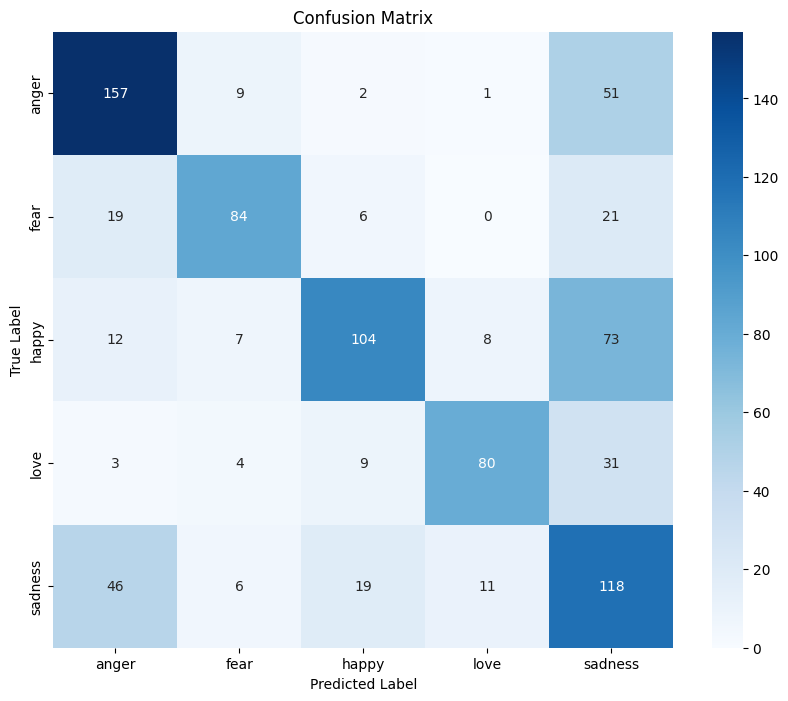

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Text: I am so happy today!
Emotion: happy (confidence: 0.995)
Top probabilities:
  anger: 0.000
  fear: 0.000
  happy: 0.995
  love: 0.001
  sadness: 0.003
---
Text: This makes me really angry
Emotion: sadness (confidence: 0.855)
Top probabilities:
  anger: 0.108
  fear: 0.009
  happy: 0.026
  love: 0.002
  sadness: 0.855
---
Text: I feel so sad and lonely
Emotion: happy (confidence: 0.890)
Top probabilities:
  anger: 0.002
  fear: 0.002
  happy: 0.890
  love: 0.006
  sadness: 0.100
---
Text: What an amazing day!
Emotion: sadness (confidence: 0.677)
Top probabilities:
  anger: 0.116
  fear: 0.022
  happy: 0.181
  love: 0.004
  sadness: 0.677
---


In [ ]:
# 1. Install TensorFlow jika belum ada
# !pip install tensorflow

# 2. Setelah menjalankan preprocessing pipeline
datasets = create_bilstm_datasets(df, config)

# 3. Train BiLSTM model dengan konfigurasi custom
model_config = {
    'embedding_dim': 128,      # Dimensi embedding
    'lstm_units': 64,          # LSTM units
    'dropout_rate': 0.3,       # Dropout rate
    'learning_rate': 0.001,    # Learning rate
    'epochs': 50,              # Max epochs (ada early stopping)
    'batch_size': 32           # Batch size
}

# 4. Train model (complete pipeline)
bilstm_model, evaluation_results = train_emotion_bilstm(datasets, model_config)

# 5. Test dengan teks baru
test_texts = [
    "I am so happy today!",
    "This makes me really angry",
    "I feel so sad and lonely",
    "What an amazing day!"
]

predictions = bilstm_model.predict_emotion(test_texts, datasets['preprocessor'])

# 6. Print results
for pred in predictions:
    print(f"Text: {pred['text']}")
    print(f"Emotion: {pred['predicted_emotion']} (confidence: {pred['confidence']:.3f})")
    print("Top probabilities:")
    for emotion, prob in pred['probabilities'].items():
        print(f"  {emotion}: {prob:.3f}")
    print("---")

# ***Train Data Mentah***

In [ ]:
# ── CELL 1: PREPARE RAW DATA & SPLIT ──

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Ambil hasil EDA
MAX_LEN    = preprocessing_config['max_length']       # rekomendasi panjang seq
VOCAB_SIZE = preprocessing_config['vocab_size']       # rekomendasi ukuran vocab

# 2. Siapkan teks & label
texts  = df['tweet'].astype(str).tolist()
labels = df['label'].tolist()

# 3. Encode label ke angka
le       = LabelEncoder()
y_encoded = le.fit_transform(labels)

# 4. Tokenizer hanya minimal (raw text)
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>', lower=True, filters='')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# 5. Pad sequences
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# 6. Split ke train/val/test (80–10–10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
val_ratio = 0.1 / 0.8
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_ratio, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (3080, 44), Val: (440, 44), Test: (881, 44)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 373ms/step - accuracy: 0.2817 - loss: 1.5760 - val_accuracy: 0.4182 - val_loss: 1.4317
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 364ms/step - accuracy: 0.4887 - loss: 1.2711 - val_accuracy: 0.5636 - val_loss: 1.1275
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 372ms/step - accuracy: 0.7766 - loss: 0.6499 - val_accuracy: 0.6114 - val_loss: 1.0711
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 34s 355ms/step - accuracy: 0.9401 - loss: 0.2360 - val_accuracy: 0.6136 - val_loss: 1.1375
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 44s 384ms/step - accuracy: 0.9772 - loss: 0.0994 - val_accuracy: 0.6250 - val_loss: 1.2678
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 365ms/step - accuracy: 0.9844 - loss: 0.0618 - val_accuracy: 0.6295 - val_loss: 1.2362
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 368ms/step - accuracy: 0.9883 - loss: 0.0586 - val_accuracy: 0.6182 - val_loss: 1.3129
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accu

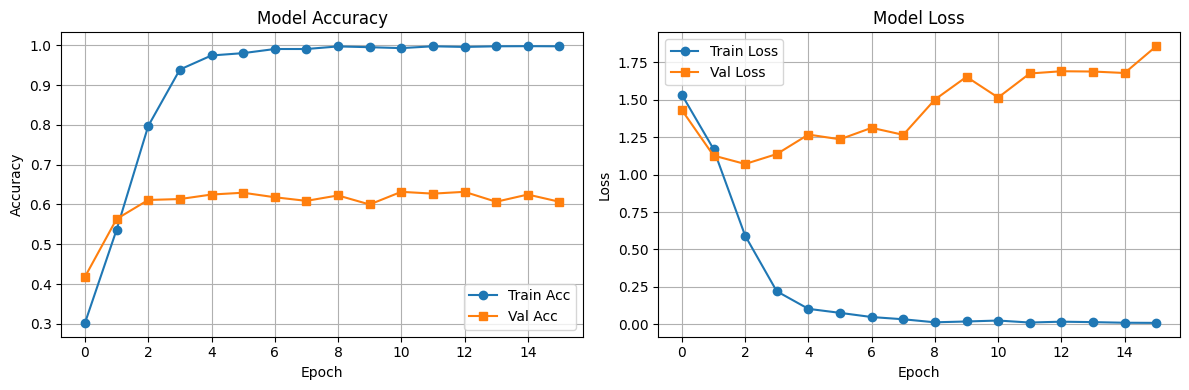


✅ Training completed!
📈 Training Summary:
   • Best Validation Accuracy: 0.6318 (Epoch 11)
   • Final Training Accuracy: 0.9977
   • Final Validation Accuracy: 0.6068

📊 Evaluating Model...
✅ Test Results:
   • Test Loss: 1.8130
   • Test Accuracy: 0.5743
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step

📈 Classification Report:
              precision    recall  f1-score   support

       anger       0.65      0.60      0.62       220
        fear       0.63      0.59      0.61       130
       happy       0.52      0.68      0.59       204
        love       0.71      0.61      0.66       127
     sadness       0.46      0.41      0.43       200

    accuracy                           0.57       881
   macro avg       0.59      0.58      0.58       881
weighted avg       0.58      0.57      0.57       881



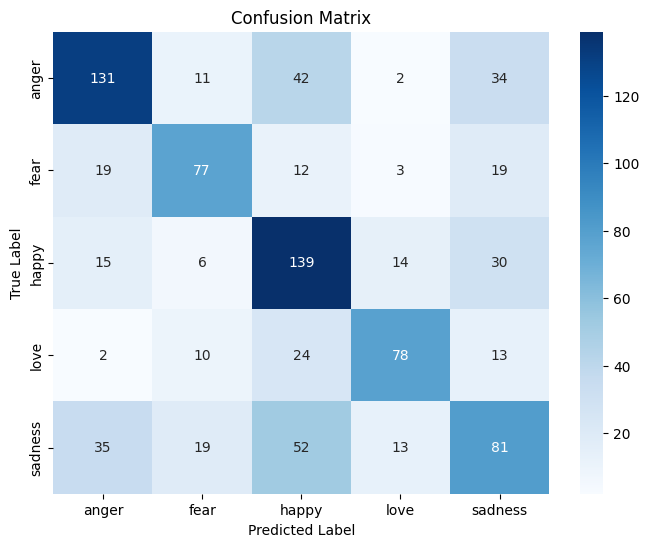


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Text: I am so happy today!
Emotion: happy (confidence: 0.962)
Top probabilities:
  anger: 0.012
  fear: 0.004
  happy: 0.962
  love: 0.017
  sadness: 0.006
---
Text: This makes me really angry
Emotion: fear (confidence: 0.337)
Top probabilities:
  anger: 0.259
  fear: 0.337
  happy: 0.148
  love: 0.067
  sadness: 0.190
---
Text: I feel so sad and lonely
Emotion: anger (confidence: 0.511)
Top probabilities:
  anger: 0.511
  fear: 0.001
  happy: 0.471
  love: 0.000
  sadness: 0.016
---
Text: What an amazing day!
Emotion: sadness (confidence: 0.523)
Top probabilities:
  anger: 0.048
  fear: 0.068
  happy: 0.230
  love: 0.130
  sadness: 0.523
---

✅ Model, tokenizer, and label encoder saved.


In [ ]:
# ── CELL 2: BUILD, TRAIN, EVALUATE, PLOT & SAVE BiLSTM RAW ──

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Build model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=MAX_LEN, mask_zero=True),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

# 2. Train with EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# 3. Plot training history
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Print training summary
best_epoch     = np.argmax(history.history['val_accuracy']) + 1
best_val_acc   = history.history['val_accuracy'][best_epoch-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc   = history.history['val_accuracy'][-1]

print(f"\n✅ Training completed!")
print(f"📈 Training Summary:")
print(f"   • Best Validation Accuracy: {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"   • Final Training Accuracy: {final_train_acc:.4f}")
print(f"   • Final Validation Accuracy: {final_val_acc:.4f}")

# 5. Evaluate on test set
print(f"\n📊 Evaluating Model...")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Results:")
print(f"   • Test Loss: {test_loss:.4f}")
print(f"   • Test Accuracy: {test_acc:.4f}")

# 6. Classification report
y_pred_probs = model.predict(X_test)
y_pred       = np.argmax(y_pred_probs, axis=1)
print(f"\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 8. Sample predictions
print()
sample_texts = [
    "I am so happy today!",
    "This makes me really angry",
    "I feel so sad and lonely",
    "What an amazing day!"
]
seqs   = tokenizer.texts_to_sequences(sample_texts)
padded = pad_sequences(seqs, maxlen=MAX_LEN, padding='post')
probs  = model.predict(padded)

for i, text in enumerate(sample_texts):
    idx  = np.argmax(probs[i])
    conf = probs[i][idx]
    print(f"Text: {text}")
    print(f"Emotion: {le.inverse_transform([idx])[0]} (confidence: {conf:.3f})")
    print("Top probabilities:")
    for j, p in enumerate(probs[i]):
        print(f"  {le.inverse_transform([j])[0]}: {p:.3f}")
    print("---")

# 9. Save model, tokenizer, and label encoder
model.save('/content/bilstm_raw_model.h5')
with open('/content/tokenizer_raw.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('/content/label_encoder_raw.pkl', 'wb') as f:
    pickle.dump(le, f)

print("\n✅ Model, tokenizer, and label encoder saved.")


# ***Test Model***

In [ ]:
import re
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ====== KONFIGURASI PATH ======
MODEL_PATH      = '/content/bilstm_raw_model.h5'
TOKENIZER_PATH  = '/content/tokenizer_raw.pkl'
LABELENC_PATH   = '/content/label_encoder_raw.pkl'

# ====== SETTING MANUAL SESUAI TRAINING ======
VOCAB_SIZE = 19306
MAX_LEN = 44

# ====== LOAD MODEL DAN KOMPONEN ======
print("📂 Loading model...")

model = load_model(MODEL_PATH)
with open(TOKENIZER_PATH, 'rb') as f:
    tokenizer = pickle.load(f)
with open(LABELENC_PATH, 'rb') as f:
    le = pickle.load(f)

print("✅ Model loaded successfully!")
print("📊 Model info:")
print(f"   • Vocabulary size: {VOCAB_SIZE:,}")
print(f"   • Max sequence length: {MAX_LEN}")
print(f"   • Available emotions: {list(le.classes_)}")

# ====== PENGOLAHAN TEKS ======
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# ====== FUNGSI PREDIKSI ======
def predict_single(text):
    txt = clean_text(text)
    seq = tokenizer.texts_to_sequences([txt])
    pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post')
    probs = model.predict(pad, verbose=0)[0]
    idx   = np.argmax(probs)
    label = le.inverse_transform([idx])[0]

    print("\n🔍 Result:")
    print(f"📝 Text        : {text}")
    print(f"🎭 Emotion     : {label.upper()}")
    print(f"🎯 Confidence  : {probs[idx]:.3f} ({probs[idx]*100:.1f}%)\n")

    print("📊 All Probabilities:")
    for i, emo in enumerate(le.classes_):
        bar_len = int(probs[i] * 30)
        bar = "█" * bar_len
        print(f"  {emo:<8} | {bar:<30} | {probs[i]:.3f}")

# ====== INPUT USER ======
user_input = input("💬 Masukkan teks untuk prediksi emosi: ").strip()
if user_input:
    predict_single(user_input)
else:
    print("⚠️  Tidak ada teks yang dimasukkan.")


📂 Loading model...
✅ Model loaded successfully!
📊 Model info:
   • Vocabulary size: 19,306
   • Max sequence length: 44
   • Available emotions: [np.str_('anger'), np.str_('fear'), np.str_('happy'), np.str_('love'), np.str_('sadness')]
💬 Masukkan teks untuk prediksi emosi: Soal jln Jatibaru,polisi tdk bs GERTAK gubernu

🔍 Result:
📝 Text        : Soal jln Jatibaru,polisi tdk bs GERTAK gubernu
🎭 Emotion     : FEAR
🎯 Confidence  : 0.343 (34.3%)

📊 All Probabilities:
  anger    |                                | 0.006
  fear     | ██████████                     | 0.343
  happy    | █████████                      | 0.309
  love     | █████████                      | 0.305
  sadness  | █                              | 0.037


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import re

# ===== LOAD MODEL DAN KOMPONEN =====
def load_model_components():
    print("📂 Loading model...")

    # Load model
    model = load_model('/content/best_bilstm_model.h5')
    print("✅ Model loaded successfully!")

    global preprocessor, datasets
    tokenizer = datasets['preprocessor'].tokenizer
    label_encoder = datasets['preprocessor'].label_encoder
    max_length = datasets['config']['max_sequence_length']

    print(f"📊 Model info:")
    print(f"   • Vocabulary size: {len(tokenizer.word_index):,}")
    print(f"   • Max sequence length: {max_length}")
    print(f"   • Available emotions: {list(label_encoder.classes_)}")

    return model, tokenizer, label_encoder, max_length

# ===== TEXT PREPROCESSING =====
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http[s]?://\S+|www\.\S+', '<url>', text)
    text = re.sub(r'@\w+', '<user>', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'\d+', '<number>', text)
    text = re.sub(r'([!?.]){2,}', r'\1', text)
    text = re.sub(r'([a-zA-Z])\1{2,}', r'\1\1', text)
    text = ' '.join(text.split())
    text = re.sub(r'[^\w\s!?.,]', '', text)
    return text

# ===== PREDICT FUNCTION =====
def predict_emotion(text, model, tokenizer, label_encoder, max_length):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded, verbose=0)

    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])
    emotion = label_encoder.inverse_transform([predicted_class])[0]

    print("\n🔍 Result:")
    print(f"📝 Text        : {text}")
    print(f"🎭 Emotion     : {emotion.upper()}")
    print(f"🎯 Confidence  : {confidence:.3f} ({confidence*100:.1f}%)\n")

    print("📊 All Probabilities:")
    for i, emo in enumerate(label_encoder.classes_):
        bar = "█" * int(prediction[0][i] * 30)
        print(f"  {emo:8} | {bar:<30} | {prediction[0][i]:.3f}")

# ===== RUN IMMEDIATELY =====
# Langsung jalan tanpa pilihan menu
try:
    model, tokenizer, label_encoder, max_length = load_model_components()
    user_input = input("💬 Masukkan teks untuk prediksi emosi: ")
    predict_emotion(user_input, model, tokenizer, label_encoder, max_length)
except Exception as e:
    print(f"❌ Error: {e}")


📂 Loading model...
✅ Model loaded successfully!
📊 Model info:
   • Vocabulary size: 19,306
   • Max sequence length: 44
   • Available emotions: ['anger', 'fear', 'happy', 'love', 'sadness']
💬 Masukkan teks untuk prediksi emosi: Soal jln Jatibaru,polisi tdk bs GERTAK gubernu

🔍 Result:
📝 Text        : Soal jln Jatibaru,polisi tdk bs GERTAK gubernu
🎭 Emotion     : ANGER
🎯 Confidence  : 0.999 (99.9%)

📊 All Probabilities:
  anger    | █████████████████████████████  | 0.999
  fear     |                                | 0.000
  happy    |                                | 0.000
  love     |                                | 0.000
  sadness  |                                | 0.001


# ***BiLSTM GRU***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class EmotionBiLSTMGRU:
    def __init__(self, vocab_size, max_length, num_classes, embedding_dim=128, lstm_units=64, gru_units=64):
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.num_classes = num_classes
        self.embedding_dim = embedding_dim
        self.lstm_units = lstm_units
        self.gru_units = gru_units
        self.model = None
        self.history = None

    def build_model(self, dropout_rate=0.3, recurrent_dropout=0.3):
        print("🏗️ Building BiLSTM-GRU Model...")
        print("="*50)

        self.model = Sequential([
            Embedding(
                input_dim=self.vocab_size,
                output_dim=self.embedding_dim,
                input_length=self.max_length,
                mask_zero=True,
                name='embedding'
            ),
            SpatialDropout1D(dropout_rate, name='spatial_dropout'),

            # BiLSTM layer
            Bidirectional(
                LSTM(self.lstm_units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout, return_sequences=True),
                name='bidirectional_lstm'
            ),

            # GRU layer
            GRU(self.gru_units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout, return_sequences=False, name='gru'),

            Dense(64, activation='relu'),
            Dropout(dropout_rate),
            Dense(32, activation='relu'),
            Dropout(dropout_rate),
            Dense(self.num_classes, activation='softmax')
        ])

        self.model.summary()
        return self.model

    def compile_model(self, learning_rate=0.001):
        optimizer = Adam(learning_rate=learning_rate)
        loss = 'sparse_categorical_crossentropy'
        self.model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    def prepare_callbacks(self):
        return [
            EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
            ModelCheckpoint('best_bilstm_gru_model.h5', monitor='val_accuracy', save_best_only=True)
        ]

    def calculate_class_weights(self, y_train):
        weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        return dict(zip(np.unique(y_train), weights))

    def train_model(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32, use_class_weights=True):
        callbacks = self.prepare_callbacks()
        class_weights = self.calculate_class_weights(y_train) if use_class_weights else None

        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            class_weight=class_weights,
            verbose=1
        )
        return self.history

    def evaluate_model(self, X_test, y_test, label_encoder=None):
        y_pred_proba = self.model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)
        loss, acc = self.model.evaluate(X_test, y_test, verbose=0)

        print(f"Test Accuracy: {acc:.4f}")
        print(f"Test Loss: {loss:.4f}")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_ if label_encoder else None))

        self.plot_confusion_matrix(y_test, y_pred, label_encoder.classes_ if label_encoder else [f"Class_{i}" for i in range(self.num_classes)])
        return y_pred

    def plot_confusion_matrix(self, y_true, y_pred, labels):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    def plot_training_history(self):
        if not self.history:
            print("No training history found.")
            return
        plt.plot(self.history.history['accuracy'], label='Train Acc')
        plt.plot(self.history.history['val_accuracy'], label='Val Acc')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Val Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def predict_emotion(self, texts, preprocessor, top_k=3):
      sequences = preprocessor.tokenizer.texts_to_sequences(texts)
      padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=self.max_length, padding='post')
      probs = self.model.predict(padded)
      preds = np.argmax(probs, axis=1)
      results = []

      for i, prob_dist in enumerate(probs):
          pred_index = preds[i]
          predicted_emotion = preprocessor.label_encoder.inverse_transform([pred_index])[0]
          top_indices = prob_dist.argsort()[-top_k:][::-1]
          top_probs = {
              preprocessor.label_encoder.inverse_transform([idx])[0]: float(prob_dist[idx])
              for idx in top_indices
          }
          results.append({
              'text': texts[i],
              'predicted_emotion': predicted_emotion,
              'confidence': float(prob_dist[pred_index]),
              'probabilities': top_probs
          })

      return results

# Training Pipeline
def train_emotion_bilstm_gru(datasets, model_config=None):
    print("🚀 Training BiLSTM-GRU for Emotion Detection")

    pre = datasets['preprocessor']
    data = datasets['preprocessed']
    X_train, y_train = data['splits']['X_train'], data['splits']['y_train']
    X_val, y_val = data['splits']['X_val'], data['splits']['y_val']
    X_test, y_test = data['splits']['X_test'], data['splits']['y_test']

    vocab_size = len(pre.tokenizer.word_index) + 1
    max_len = datasets['config']['max_sequence_length']
    num_classes = len(pre.label_encoder.classes_)

    if model_config is None:
        model_config = {
            'embedding_dim': 128,
            'lstm_units': 64,
            'gru_units': 64,
            'dropout_rate': 0.3,
            'learning_rate': 0.001,
            'epochs': 50,
            'batch_size': 32
        }

    model = EmotionBiLSTMGRU(vocab_size, max_len, num_classes,
                             model_config['embedding_dim'],
                             model_config['lstm_units'],
                             model_config['gru_units'])

    model.build_model(model_config['dropout_rate'])
    model.compile_model(model_config['learning_rate'])
    model.train_model(X_train, y_train, X_val, y_val,
                      epochs=model_config['epochs'],
                      batch_size=model_config['batch_size'])
    model.plot_training_history()
    results = model.evaluate_model(X_test, y_test, pre.label_encoder)

    return model, results


🚀 CREATING BiLSTM DATASETS
🔧 PREPARING RAW DATA...
✅ Raw data prepared:
   • Total samples: 4,401
   • Average text length: 182.3 chars
   • Average words: 28.8

📊 SPLITTING DATA...
✅ Data split completed (raw):
   • Training set: 3,080 samples (70.0%)
   • Validation set: 440 samples (10.0%)
   • Test set: 881 samples (20.0%)

📈 Class distribution:
   • Train: [np.int64(771), np.int64(454), np.int64(711), np.int64(446), np.int64(698)] (['25.0%', '14.7%', '23.1%', '14.5%', '22.7%'])
   • Val: [np.int64(110), np.int64(65), np.int64(102), np.int64(64), np.int64(99)] (['25.0%', '14.8%', '23.2%', '14.5%', '22.5%'])
   • Test: [np.int64(220), np.int64(130), np.int64(204), np.int64(127), np.int64(200)] (['25.0%', '14.8%', '23.2%', '14.4%', '22.7%'])

🔧 PREPARING PREPROCESSED DATA...
🧹 Applying text cleaning...
📚 Building vocabulary...
📚 Vocabulary built:
   • Total unique words: 24,949
   • Words after frequency filter (>=2): 8,972
   • Final vocabulary size: 8,972
🔢 Converting texts to sequ

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout                 │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm              │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.2256 - loss: 1.6009

97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 504ms/step - accuracy: 0.2259 - loss: 1.6006 - val_accuracy: 0.3773 - val_loss: 1.4330 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.3668 - loss: 1.3824

97/97 ━━━━━━━━━━━━━━━━━━━━ 50s 508ms/step - accuracy: 0.3668 - loss: 1.3822 - val_accuracy: 0.4068 - val_loss: 1.3409 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.4284 - loss: 1.2272

97/97 ━━━━━━━━━━━━━━━━━━━━ 50s 512ms/step - accuracy: 0.4285 - loss: 1.2269 - val_accuracy: 0.4341 - val_loss: 1.2867 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.5568 - loss: 1.0047

97/97 ━━━━━━━━━━━━━━━━━━━━ 51s 528ms/step - accuracy: 0.5568 - loss: 1.0046 - val_accuracy: 0.4636 - val_loss: 1.2698 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7105 - loss: 0.7365

97/97 ━━━━━━━━━━━━━━━━━━━━ 79s 502ms/step - accuracy: 0.7106 - loss: 0.7360 - val_accuracy: 0.4955 - val_loss: 1.3909 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.8175 - loss: 0.4798

97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 489ms/step - accuracy: 0.8175 - loss: 0.4797 - val_accuracy: 0.4977 - val_loss: 1.5915 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.8942 - loss: 0.3155

97/97 ━━━━━━━━━━━━━━━━━━━━ 49s 506ms/step - accuracy: 0.8941 - loss: 0.3156 - val_accuracy: 0.5227 - val_loss: 1.8051 - learning_rate: 0.0010
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.9298 - loss: 0.2190

97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 506ms/step - accuracy: 0.9298 - loss: 0.2189 - val_accuracy: 0.5318 - val_loss: 1.9963 - learning_rate: 5.0000e-04
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 49s 506ms/step - accuracy: 0.9621 - loss: 0.1363 - val_accuracy: 0.5295 - val_loss: 2.3688 - learning_rate: 5.0000e-04
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 50s 516ms/step - accuracy: 0.9731 - loss: 0.0917 - val_accuracy: 0.5205 - val_loss: 2.6671 - learning_rate: 5.0000e-04
Epoch 11/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 48s 496ms/step - accuracy: 0.9722 - loss: 0.0955 - val_accuracy: 0.5250 - val_loss: 2.5695 - learning_rate: 2.5000e-04
Epoch 12/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 85s 528ms/step - accuracy: 0.9802 - loss: 0.0710 - val_accuracy: 0.5091 - val_loss: 2.6385 - learning_rate: 2.5000e-04
Epoch 13/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 78s 487ms/step - accuracy: 0.9855 - loss: 0.0526 - val_accuracy: 0.5114 - val_loss: 2.7398 - learning_rate: 2.5000e-04


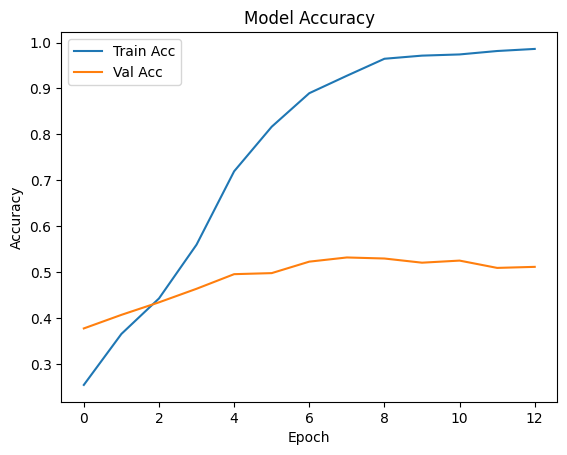

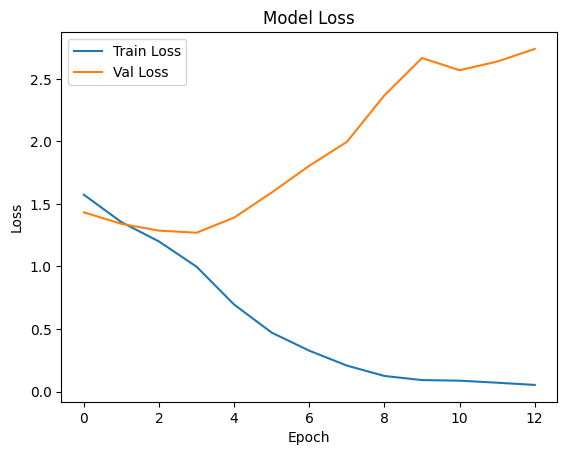

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step
Test Accuracy: 0.5244
Test Loss: 2.0640
              precision    recall  f1-score   support

       anger       0.71      0.57      0.63       220
        fear       0.49      0.58      0.53       130
       happy       0.50      0.53      0.51       204
        love       0.82      0.54      0.65       127
     sadness       0.34      0.42      0.38       200

    accuracy                           0.52       881
   macro avg       0.57      0.53      0.54       881
weighted avg       0.56      0.52      0.53       881



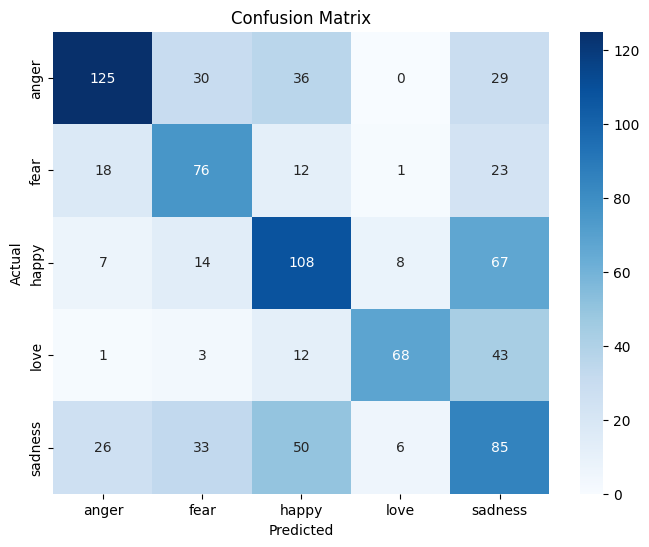

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Text: I am excited and can't wait!
Predicted Emotion: fear (confidence: 0.413)
Top Probabilities:
  fear: 0.413
  sadness: 0.385
  happy: 0.174
---
Text: This is so frustrating.
Predicted Emotion: happy (confidence: 0.754)
Top Probabilities:
  happy: 0.754
  sadness: 0.188
  anger: 0.035
---
Text: Why do I feel so empty today?
Predicted Emotion: happy (confidence: 0.797)
Top Probabilities:
  happy: 0.797
  sadness: 0.160
  anger: 0.029
---
Text: It’s a beautiful morning!
Predicted Emotion: sadness (confidence: 0.646)
Top Probabilities:
  sadness: 0.646
  happy: 0.329
  fear: 0.014
---


In [ ]:
# 1. Preprocessing data (setelah pipeline sebelumnya)
datasets = create_bilstm_datasets(df, config)

# 2. Konfigurasi model BiLSTM-GRU
model_config = {
    'embedding_dim': 128,
    'lstm_units': 64,
    'gru_units': 64,
    'dropout_rate': 0.3,
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 32
}

# 3. Latih model
bilstm_gru_model, eval_results = train_emotion_bilstm_gru(datasets, model_config)

# 4. Uji prediksi
test_texts = [
    "I am excited and can't wait!",
    "This is so frustrating.",
    "Why do I feel so empty today?",
    "It’s a beautiful morning!"
]

preds = bilstm_gru_model.predict_emotion(test_texts, datasets['preprocessor'])

# 5. Tampilkan hasil prediksi
for pred in preds:
    print(f"Text: {pred['text']}")
    print(f"Predicted Emotion: {pred['predicted_emotion']} (confidence: {pred['confidence']:.3f})")
    print("Top Probabilities:")
    for emotion, prob in pred['probabilities'].items():
        print(f"  {emotion}: {prob:.3f}")
    print("---")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.2400 - loss: 1.5964 - val_accuracy: 0.2477 - val_loss: 1.5480
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - accuracy: 0.3765 - loss: 1.4372 - val_accuracy: 0.4659 - val_loss: 1.2618
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.6775 - loss: 0.8955 - val_accuracy: 0.4841 - val_loss: 1.2405
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.8687 - loss: 0.4244 - val_accuracy: 0.5023 - val_loss: 1.4668
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.9392 - loss: 0.2213 - val_accuracy: 0.5068 - val_loss: 1.5669
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.9645 - loss: 0.1196 - val_accuracy: 0.5068 - val_loss: 1.7000
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.9745 - loss: 0.0801 - val_accuracy: 0.5136 - val_loss: 1.9483
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.9858 - loss: 0.0540 - val_accu

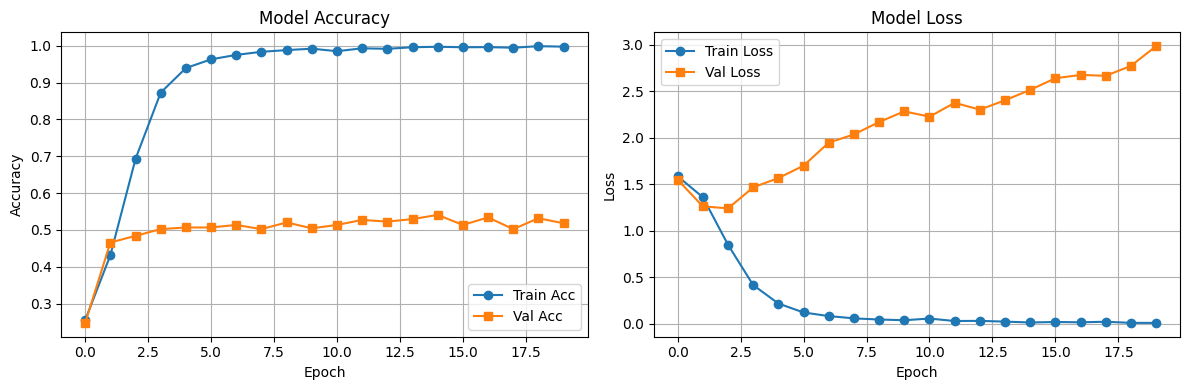


✅ Training completed!
📈 Training Summary:
   • Best Validation Accuracy: 0.5409 (Epoch 15)
   • Final Training Accuracy: 0.9977
   • Final Validation Accuracy: 0.5182

📊 Evaluating Model...
✅ Test Results:
   • Test Loss: 2.6771
   • Test Accuracy: 0.4949
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step

📈 Classification Report:
              precision    recall  f1-score   support

       anger       0.57      0.57      0.57       220
        fear       0.51      0.58      0.55       130
       happy       0.45      0.41      0.43       204
        love       0.56      0.61      0.58       127
     sadness       0.40      0.36      0.38       200

    accuracy                           0.49       881
   macro avg       0.50      0.51      0.50       881
weighted avg       0.49      0.49      0.49       881



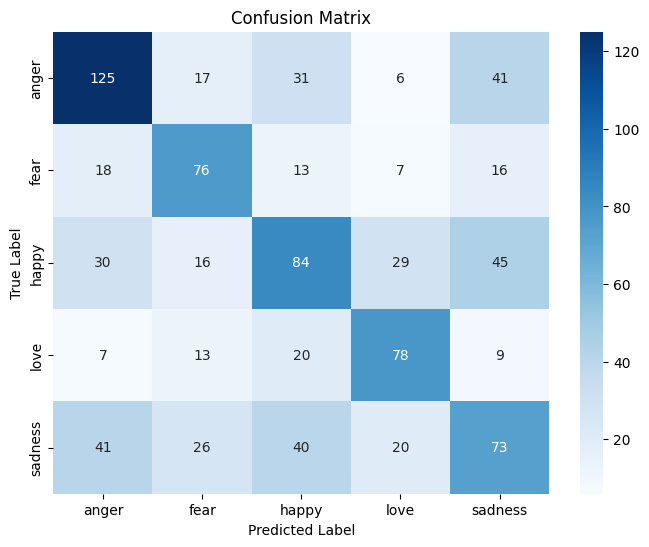


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Text: I am so happy today!
Emotion: anger (confidence: 0.616)
Top probabilities:
  anger: 0.616
  fear: 0.002
  happy: 0.365
  love: 0.003
  sadness: 0.015
---
Text: This makes me really angry
Emotion: sadness (confidence: 0.591)
Top probabilities:
  anger: 0.225
  fear: 0.114
  happy: 0.054
  love: 0.016
  sadness: 0.591
---
Text: I feel so sad and lonely
Emotion: sadness (confidence: 0.662)
Top probabilities:
  anger: 0.057
  fear: 0.207
  happy: 0.040
  love: 0.033
  sadness: 0.662
---
Text: What an amazing day!
Emotion: happy (confidence: 0.880)
Top probabilities:
  anger: 0.050
  fear: 0.005
  happy: 0.880
  love: 0.039
  sadness: 0.026
---

✅ GRU model, tokenizer, and label encoder saved.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Build model (GRU-based)
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=MAX_LEN, mask_zero=True),
    GRU(64, dropout=0.3, recurrent_dropout=0.3),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

# 2. Train with EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# 3. Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Print training summary
best_epoch     = np.argmax(history.history['val_accuracy']) + 1
best_val_acc   = history.history['val_accuracy'][best_epoch-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc   = history.history['val_accuracy'][-1]

print(f"\n✅ Training completed!")
print(f"📈 Training Summary:")
print(f"   • Best Validation Accuracy: {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"   • Final Training Accuracy: {final_train_acc:.4f}")
print(f"   • Final Validation Accuracy: {final_val_acc:.4f}")

# 5. Evaluate on test set
print(f"\n📊 Evaluating Model...")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Results:")
print(f"   • Test Loss: {test_loss:.4f}")
print(f"   • Test Accuracy: {test_acc:.4f}")

# 6. Classification report
y_pred_probs = model.predict(X_test)
y_pred       = np.argmax(y_pred_probs, axis=1)
print(f"\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 8. Sample predictions
print()
sample_texts = [
    "I am so happy today!",
    "This makes me really angry",
    "I feel so sad and lonely",
    "What an amazing day!"
]
seqs   = tokenizer.texts_to_sequences(sample_texts)
padded = pad_sequences(seqs, maxlen=MAX_LEN, padding='post')
probs  = model.predict(padded)

for i, text in enumerate(sample_texts):
    idx  = np.argmax(probs[i])
    conf = probs[i][idx]
    print(f"Text: {text}")
    print(f"Emotion: {le.inverse_transform([idx])[0]} (confidence: {conf:.3f})")
    print("Top probabilities:")
    for j, p in enumerate(probs[i]):
        print(f"  {le.inverse_transform([j])[0]}: {p:.3f}")
    print("---")

# 9. Save model, tokenizer, and label encoder
model.save('/content/gru_raw_model.h5')
with open('/content/tokenizer_raw.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('/content/label_encoder_raw.pkl', 'wb') as f:
    pickle.dump(le, f)

print("\n✅ GRU model, tokenizer, and label encoder saved.")


# ***Test GRU***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle
import re

# ===== LOAD MODEL DAN KOMPONEN GRU RAW =====
def load_gru_raw_model():
    print("📂 Loading GRU RAW model...")

    model = load_model('/content/gru_raw_model.h5')
    print("✅ GRU model loaded successfully!")

    with open('/content/tokenizer_raw.pkl', 'rb') as f:
        tokenizer = pickle.load(f)
    with open('/content/label_encoder_raw.pkl', 'rb') as f:
        label_encoder = pickle.load(f)

    # Maksimal panjang sekuens harus konsisten dengan pelatihan
    max_length = 100  # Ubah jika kamu melatih model dengan panjang berbeda

    print(f"📊 Model info:")
    print(f"   • Vocabulary size    : {len(tokenizer.word_index):,}")
    print(f"   • Max sequence length: {max_length}")
    print(f"   • Available emotions : {list(label_encoder.classes_)}")

    return model, tokenizer, label_encoder, max_length

# ===== TEXT PREPROCESSING (minimal, sesuai training raw) =====
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# ===== PREDICTION FUNCTION =====
def predict_emotion(text, model, tokenizer, label_encoder, max_length):
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')

    probs = model.predict(padded, verbose=0)[0]
    top_idx = np.argmax(probs)
    top_emotion = label_encoder.inverse_transform([top_idx])[0]
    confidence = probs[top_idx]

    print("\n🔍 Result:")
    print(f"📝 Text        : {text}")
    print(f"🎭 Emotion     : {top_emotion.upper()}")
    print(f"🎯 Confidence  : {confidence:.3f} ({confidence*100:.1f}%)")

    print("\n📊 All Probabilities:")
    for i, emo in enumerate(label_encoder.classes_):
        bar = "█" * int(probs[i] * 30)
        print(f"  {emo:10} | {bar:<30} | {probs[i]:.3f}")

# ===== RUN IMMEDIATELY =====
try:
    model, tokenizer, label_encoder, max_length = load_gru_raw_model()
    user_input = input("💬 Masukkan teks untuk prediksi emosi: ")
    predict_emotion(user_input, model, tokenizer, label_encoder, max_length)
except Exception as e:
    print(f"❌ Error: {e}")


📂 Loading GRU RAW model...
✅ GRU model loaded successfully!
📊 Model info:
   • Vocabulary size    : 19,306
   • Max sequence length: 100
   • Available emotions : [np.str_('anger'), np.str_('fear'), np.str_('happy'), np.str_('love'), np.str_('sadness')]
💬 Masukkan teks untuk prediksi emosi: Soal jln Jatibaru,polisi tdk bs GERTAK gubernu

🔍 Result:
📝 Text        : Soal jln Jatibaru,polisi tdk bs GERTAK gubernu
🎭 Emotion     : LOVE
🎯 Confidence  : 0.361 (36.1%)

📊 All Probabilities:
  anger      |                                | 0.018
  fear       | █                              | 0.042
  happy      | █████████                      | 0.329
  love       | ██████████                     | 0.361
  sadness    | ███████                        | 0.250


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import re

# ===== LOAD MODEL DAN KOMPONEN =====
def load_model_components():
    print("📂 Loading GRU model...")

    # Ganti nama file ke GRU
    model = load_model('/content/best_bilstm_gru_model.h5')
    print("✅ GRU model loaded successfully!")

    global preprocessor, datasets
    tokenizer = datasets['preprocessor'].tokenizer
    label_encoder = datasets['preprocessor'].label_encoder
    max_length = datasets['config']['max_sequence_length']

    print(f"📊 Model info:")
    print(f"   • Vocabulary size    : {len(tokenizer.word_index):,}")
    print(f"   • Max sequence length: {max_length}")
    print(f"   • Available emotions : {list(label_encoder.classes_)}")

    return model, tokenizer, label_encoder, max_length

# ===== TEXT PREPROCESSING =====
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http[s]?://\S+|www\.\S+', '<url>', text)
    text = re.sub(r'@\w+', '<user>', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'\d+', '<number>', text)
    text = re.sub(r'([!?.]){2,}', r'\1', text)
    text = re.sub(r'([a-zA-Z])\1{2,}', r'\1\1', text)
    text = ' '.join(text.split())
    text = re.sub(r'[^\w\s!?.,]', '', text)
    return text

# ===== PREDICT FUNCTION =====
def predict_emotion(text, model, tokenizer, label_encoder, max_length):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded, verbose=0)

    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])
    emotion = label_encoder.inverse_transform([predicted_class])[0]

    print("\n🔍 Result:")
    print(f"📝 Text        : {text}")
    print(f"🎭 Emotion     : {emotion.upper()}")
    print(f"🎯 Confidence  : {confidence:.3f} ({confidence*100:.1f}%)\n")

    print("📊 All Probabilities:")
    for i, emo in enumerate(label_encoder.classes_):
        bar = "█" * int(prediction[0][i] * 30)
        print(f"  {emo:8} | {bar:<30} | {prediction[0][i]:.3f}")

# ===== RUN IMMEDIATELY =====
try:
    model, tokenizer, label_encoder, max_length = load_model_components()
    user_input = input("💬 Masukkan teks untuk prediksi emosi: ")
    predict_emotion(user_input, model, tokenizer, label_encoder, max_length)
except Exception as e:
    print(f"❌ Error: {e}")


📂 Loading GRU model...
✅ GRU model loaded successfully!
📊 Model info:
   • Vocabulary size    : 19,306
   • Max sequence length: 44
   • Available emotions : ['anger', 'fear', 'happy', 'love', 'sadness']
💬 Masukkan teks untuk prediksi emosi: Soal jln Jatibaru,polisi tdk bs GERTAK gubernu

🔍 Result:
📝 Text        : Soal jln Jatibaru,polisi tdk bs GERTAK gubernu
🎭 Emotion     : ANGER
🎯 Confidence  : 0.914 (91.4%)

📊 All Probabilities:
  anger    | ███████████████████████████    | 0.914
  fear     | █                              | 0.067
  happy    |                                | 0.015
  love     |                                | 0.000
  sadness  |                                | 0.004
